In [1]:
import pandas as pd
import numpy as np
import warnings
#In some executions, we can get warnings which we can ignore them by using filterwarnings.
warnings.filterwarnings("ignore")

reg_train_data = pd.read_csv("regression_train.csv")
reg_train_data.head()

,Hospital Type,Num of Doctors,Num of Staff,Num of Departments,Surgical Facilities,Working Hours,Inpatient Facility,Outpatient Facility,Serving Population,Serving area,Hospital Revenue
0,General hospital,133.0,290.0,10.0,No,10-7,No,No,NaN,Rural,1356885
1,General hospital,141.0,290.0,NaN,No,24/7,Yes,Yes,"200,000+",Urban,2584425
2,NaN,89.0,212.0,15.0,Yes,8-5,Yes,NaN,"100,000 - 150,000",Rural,4069519
3,Teaching hospital,81.0,249.0,15.0,No,9-6,Yes,No,NaN,Rural,2584425
4,Community hospital,141.0,353.0,21.0,Yes,9-6,Yes,Yes,"50,000 - 100,000",Rural,1781324


In [2]:
reg_test_data = pd.read_csv("regression_test.csv")
reg_test_data.head()

,Hospital Type,Num of Doctors,Num of Staff,Num of Departments,Surgical Facilities,Working Hours,Inpatient Facility,Outpatient Facility,Serving Population,Serving area
0,Community hospital,133.0,290.0,12.0,No,NaN,No,Yes,"150,000-200,000",Urban
1,Community hospital,141.0,212.0,10.0,NaN,9-6,No,Yes,"150,000-200,000",Urban
2,Children's hospital,NaN,353.0,10.0,Yes,NaN,Yes,Yes,"150,000-200,000",Urban
3,Teaching hospital,90.0,249.0,15.0,Yes,10-7,No,Yes,"100,000 - 150,000",Rural
4,NaN,89.0,290.0,NaN,Yes,8-5,No,Yes,"100,000 - 150,000",Rural


In [3]:
reg_train_data.columns, reg_test_data.columns

(Index(['Hospital Type', 'Num of Doctors', 'Num of Staff', 'Num of Departments',
        'Surgical Facilities', 'Working Hours', 'Inpatient Facility',
        'Outpatient Facility', 'Serving Population', 'Serving area',
        'Hospital Revenue'],
       dtype='object'),
 Index(['Hospital Type', 'Num of Doctors', 'Num of Staff', 'Num of Departments',
        'Surgical Facilities', 'Working Hours', 'Inpatient Facility',
        'Outpatient Facility', 'Serving Population', 'Serving area'],
       dtype='object'))

There is one column missing in test data of regression dataset. The column name is "Hospital Revenue".

In [4]:
reg_train_data.shape, reg_test_data.shape

((1000, 11), (200, 10))

In [5]:
# Finding count of missing values per each col

reg_train_data.isna().sum()

Hospital Type          102
Num of Doctors          97
Num of Staff            93
Num of Departments      95
Surgical Facilities     97
Working Hours          108
Inpatient Facility      93
Outpatient Facility     99
Serving Population     121
Serving area            97
Hospital Revenue         0
dtype: int64

In [6]:
reg_test_data.isna().sum()

Hospital Type          23
Num of Doctors         23
Num of Staff           18
Num of Departments     22
Surgical Facilities    25
Working Hours          13
Inpatient Facility     19
Outpatient Facility    22
Serving Population     20
Serving area           11
dtype: int64

In [7]:
def missing_percent(df):
  # Overall missing values in terms of percentage
  return round(((df.isna().sum().sum()*100)/(df.shape[0]*df.shape[1])), 2)

missing_percent(reg_train_data), missing_percent(reg_test_data)

(9.11, 9.8)

Total 9.1% of data is missing from regression train dataset and 9.8% of data is missing from regression testing dataset.

In [8]:
reg_train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Hospital Type        898 non-null    object 
 1   Num of Doctors       903 non-null    float64
 2   Num of Staff         907 non-null    float64
 3   Num of Departments   905 non-null    float64
 4   Surgical Facilities  903 non-null    object 
 5   Working Hours        892 non-null    object 
 6   Inpatient Facility   907 non-null    object 
 7   Outpatient Facility  901 non-null    object 
 8   Serving Population   879 non-null    object 
 9   Serving area         903 non-null    object 
 10  Hospital Revenue     1000 non-null   int64  
dtypes: float64(3), int64(1), object(7)
memory usage: 86.1+ KB


In [9]:
reg_test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Hospital Type        177 non-null    object 
 1   Num of Doctors       177 non-null    float64
 2   Num of Staff         182 non-null    float64
 3   Num of Departments   178 non-null    float64
 4   Surgical Facilities  175 non-null    object 
 5   Working Hours        187 non-null    object 
 6   Inpatient Facility   181 non-null    object 
 7   Outpatient Facility  178 non-null    object 
 8   Serving Population   180 non-null    object 
 9   Serving area         189 non-null    object 
dtypes: float64(3), object(7)
memory usage: 15.8+ KB


In [10]:
# analyzing the summary stats for our train data
reg_train_data.describe()

,Num of Doctors,Num of Staff,Num of Departments,Hospital Revenue
count,903.000000,907.000000,905.000000,1.000000e+03
mean,107.880399,260.184123,14.630939,2.651581e+06
std,25.125165,54.164620,3.754457,1.041047e+06
min,81.000000,206.000000,10.000000,1.356885e+06
25%,89.000000,212.000000,12.000000,1.781324e+06
50%,90.000000,249.000000,15.000000,2.584425e+06
75%,133.000000,290.000000,15.000000,3.598448e+06
max,141.000000,353.000000,21.000000,4.069519e+06


In [11]:
# analyzing the summary stats for our test data
reg_test_data.describe()

,Num of Doctors,Num of Staff,Num of Departments
count,177.000000,182.000000,178.000000
mean,106.451977,264.813187,14.410112
std,24.565294,56.258561,3.906435
min,81.000000,206.000000,10.000000
25%,89.000000,212.000000,10.500000
50%,90.000000,249.000000,15.000000
75%,133.000000,290.000000,15.000000
max,141.000000,353.000000,21.000000


In [12]:
# starting with hospital type
reg_train_data["Hospital Type"].value_counts()

Children's hospital    190
Teaching hospital      188
Community hospital     186
General hospital       175
Research hospital      159
Name: Hospital Type, dtype: int64

In [13]:
# copying our data into other variables
new_reg_train_data = reg_train_data.copy()
new_reg_test_data = reg_test_data.copy()
new_reg_train_data.head()

,Hospital Type,Num of Doctors,Num of Staff,Num of Departments,Surgical Facilities,Working Hours,Inpatient Facility,Outpatient Facility,Serving Population,Serving area,Hospital Revenue
0,General hospital,133.0,290.0,10.0,No,10-7,No,No,NaN,Rural,1356885
1,General hospital,141.0,290.0,NaN,No,24/7,Yes,Yes,"200,000+",Urban,2584425
2,NaN,89.0,212.0,15.0,Yes,8-5,Yes,NaN,"100,000 - 150,000",Rural,4069519
3,Teaching hospital,81.0,249.0,15.0,No,9-6,Yes,No,NaN,Rural,2584425
4,Community hospital,141.0,353.0,21.0,Yes,9-6,Yes,Yes,"50,000 - 100,000",Rural,1781324


In [157]:
# install this library if erro
#!pip install missingno



<AxesSubplot: >

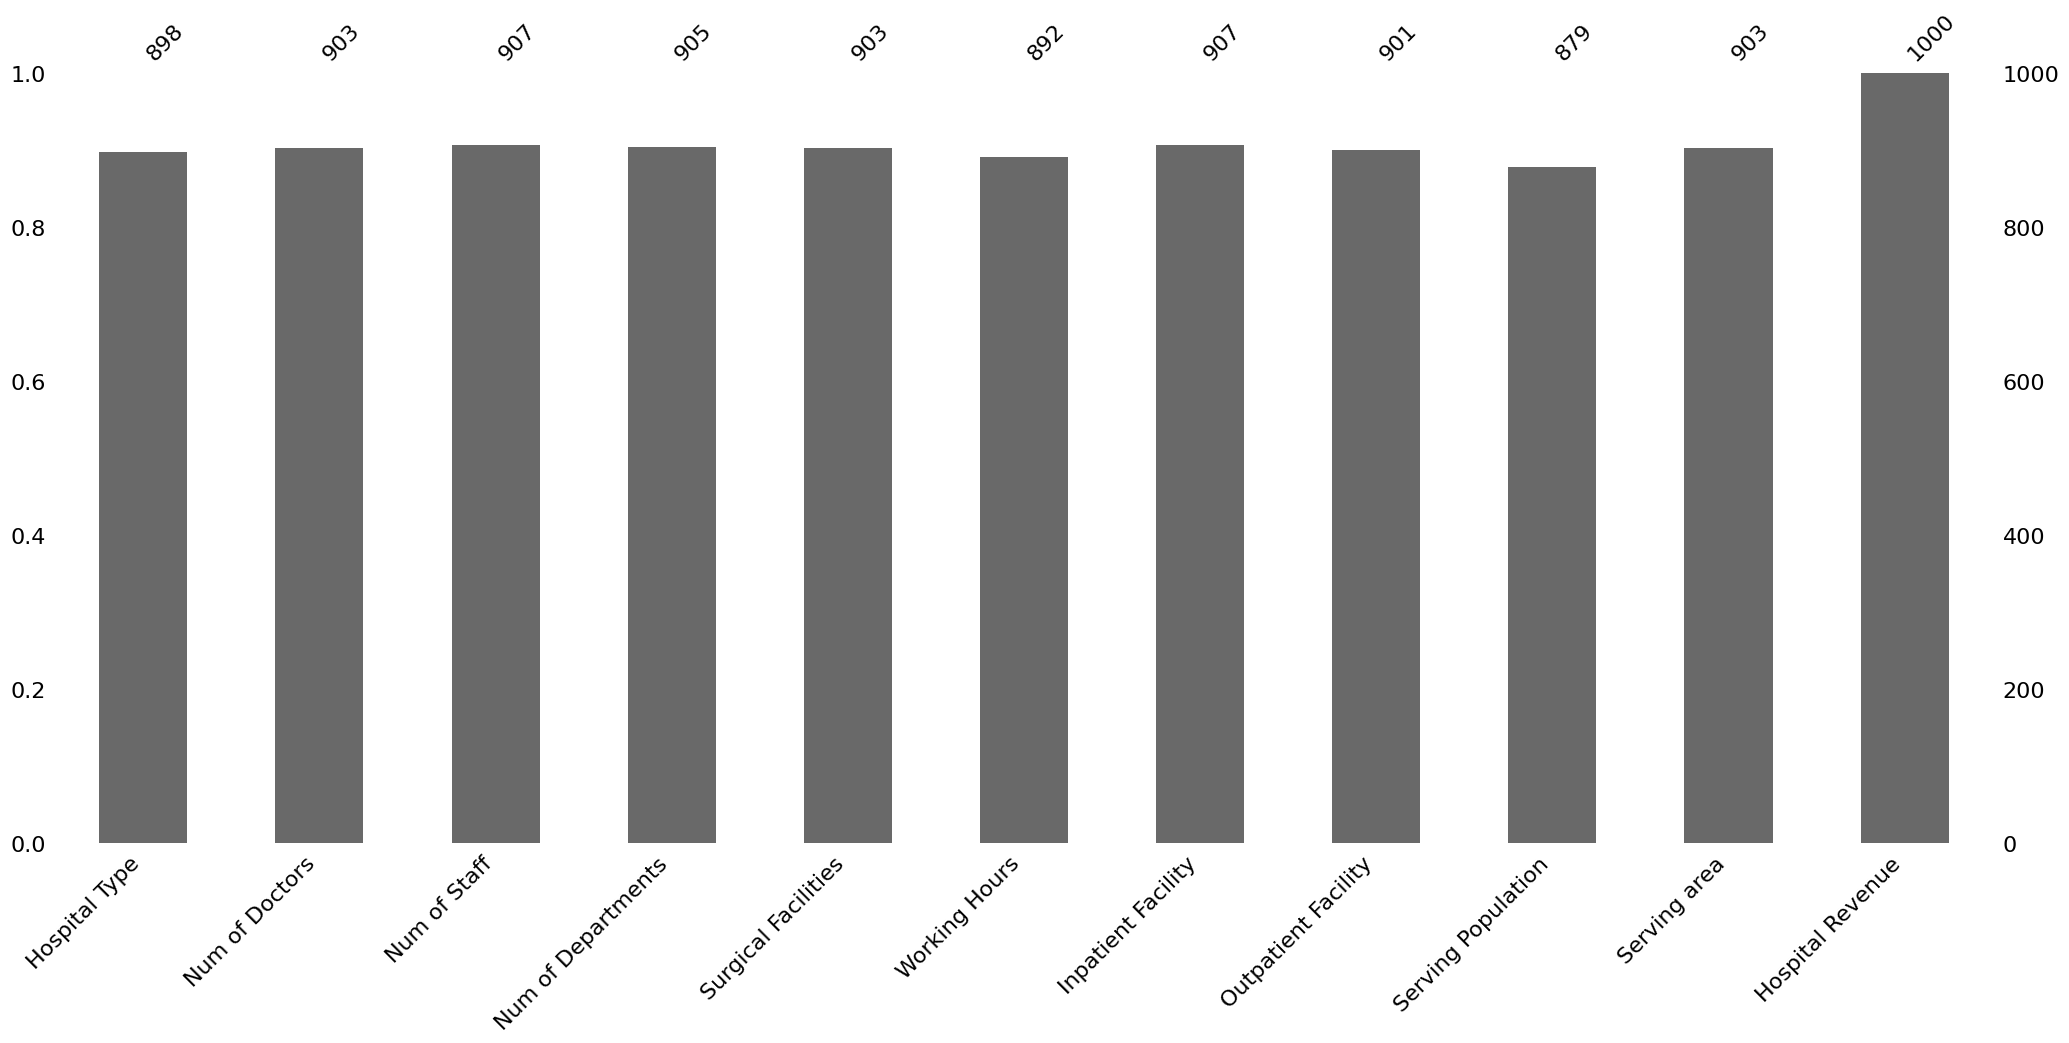

In [18]:
import missingno as msno

# plotting the missing data frequency for our train data
msno.bar(new_reg_train_data)

<AxesSubplot: >

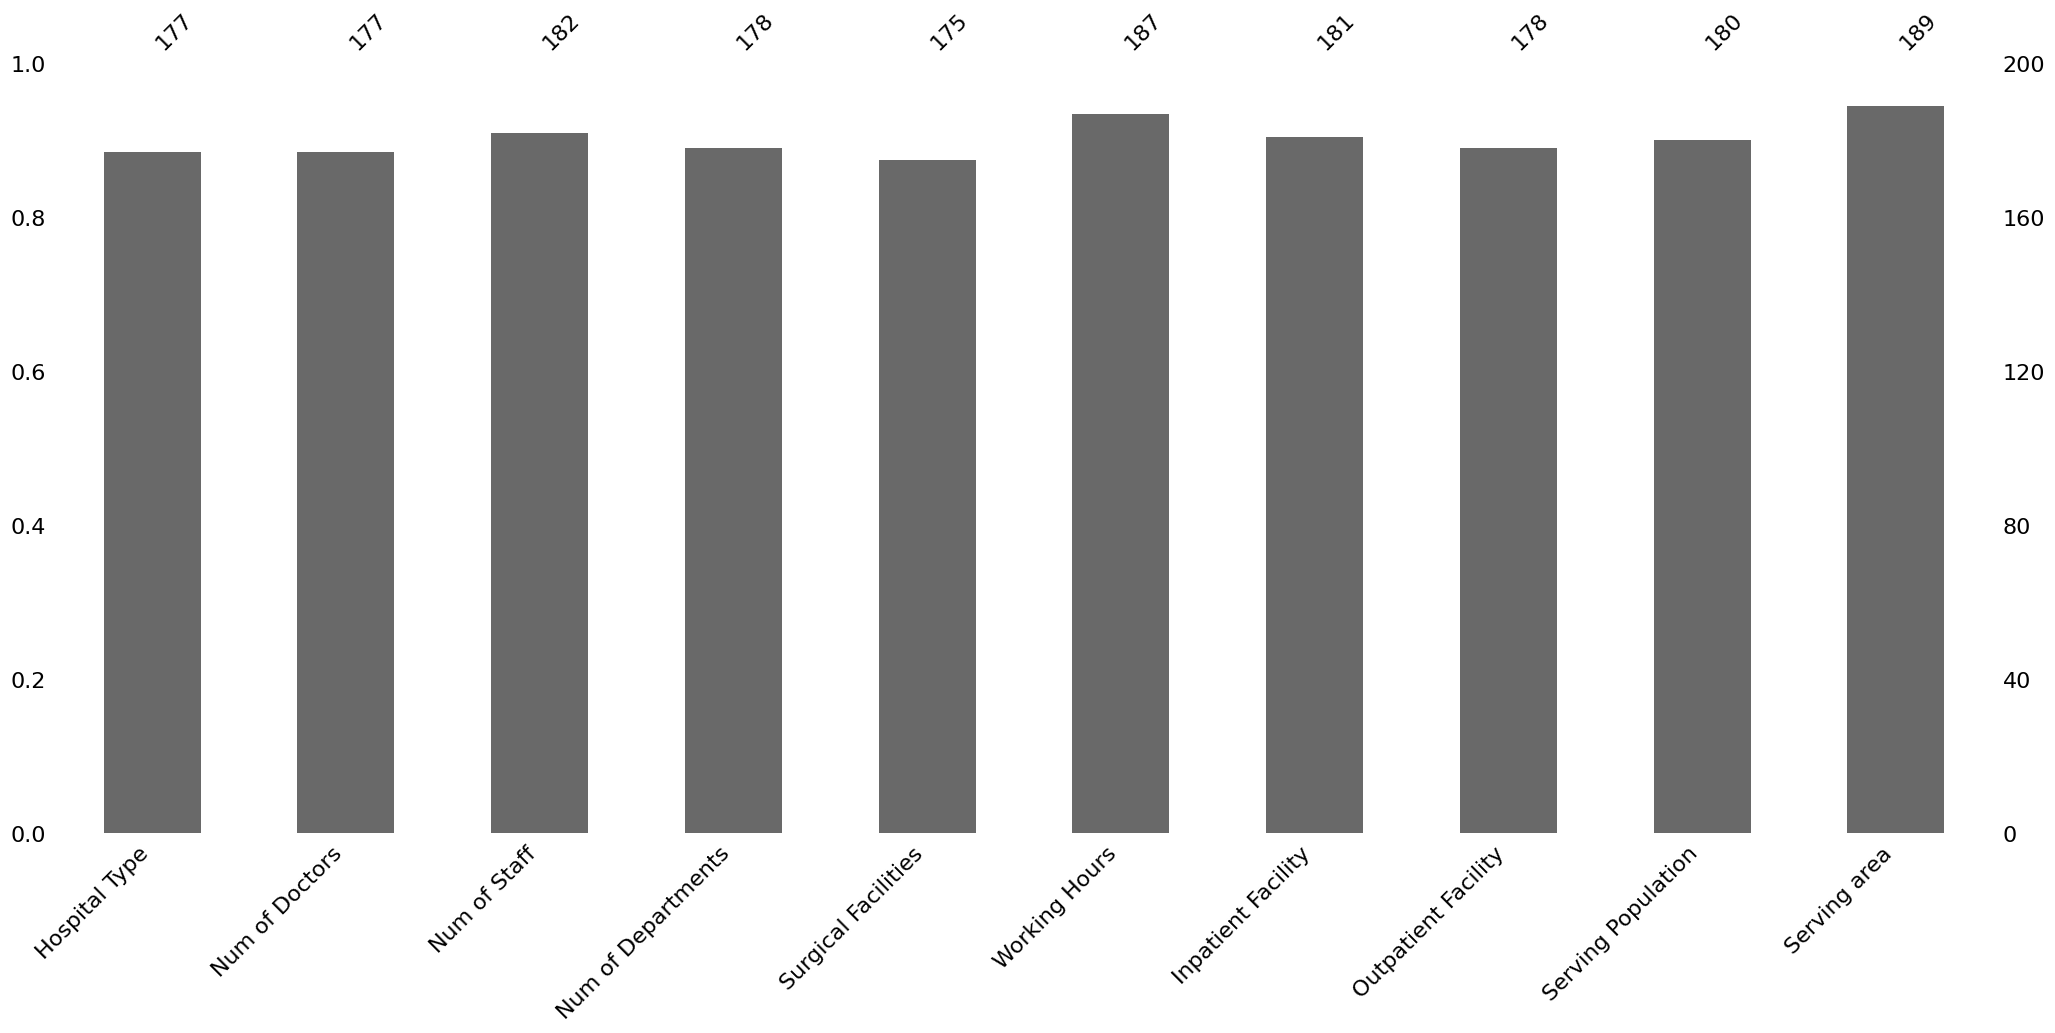

In [19]:
# plotting the missing data frequency for our test data
msno.bar(new_reg_test_data)

In [20]:
# Checking over Serving area
new_reg_train_data['Serving area'].value_counts() 

Rural    482
Urban    421
Name: Serving area, dtype: int64

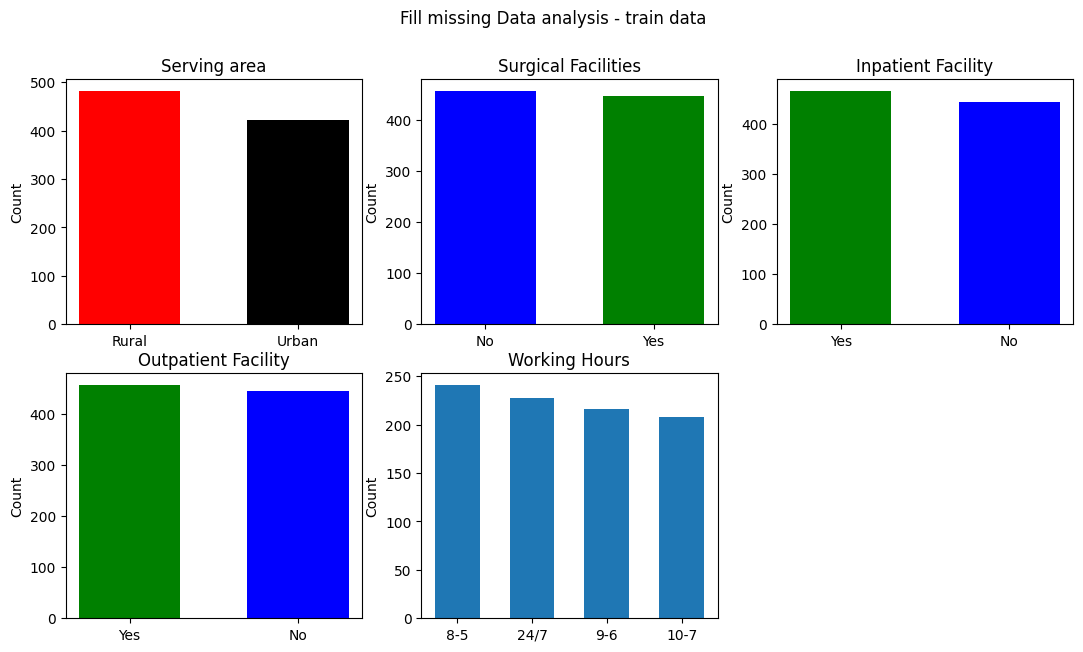

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
# plotting the frequency bar plot for our columns.
def display(df, k):
  fig = plt.figure(figsize = (13, 7))
  plt.suptitle(f"Fill missing Data analysis - {k}")
  plt.subplot(2,3,1)
  plt.ylabel("Count")
  plt.title("Serving area")
  plt.bar(df['Serving area'].value_counts().keys(), df['Serving area'].value_counts().values, width=0.6, color=['red', 'black'])
  plt.subplot(2,3,2)
  plt.ylabel("Count")
  plt.title("Surgical Facilities")
  plt.bar(df['Surgical Facilities'].value_counts().keys(), df['Surgical Facilities'].value_counts().values, width=0.6, color=['blue', 'green'])
  plt.subplot(2,3,3)
  plt.ylabel("Count")
  plt.title("Inpatient Facility")
  plt.bar(df['Inpatient Facility'].value_counts().keys(), df['Inpatient Facility'].value_counts().values, width=0.6, color=['green', 'blue'])
  plt.subplot(2,3,4)
  plt.ylabel("Count")
  plt.title("Outpatient Facility")
  plt.bar(df['Outpatient Facility'].value_counts().keys(), df['Outpatient Facility'].value_counts().values, width=0.6, color=['green','blue'])
  plt.subplot(2,3,5)
  plt.ylabel("Count")
  plt.title("Working Hours")
  plt.bar(df['Working Hours'].value_counts().keys(), df['Working Hours'].value_counts().values, width=0.6)
  plt.show()

display(new_reg_train_data, "train data")

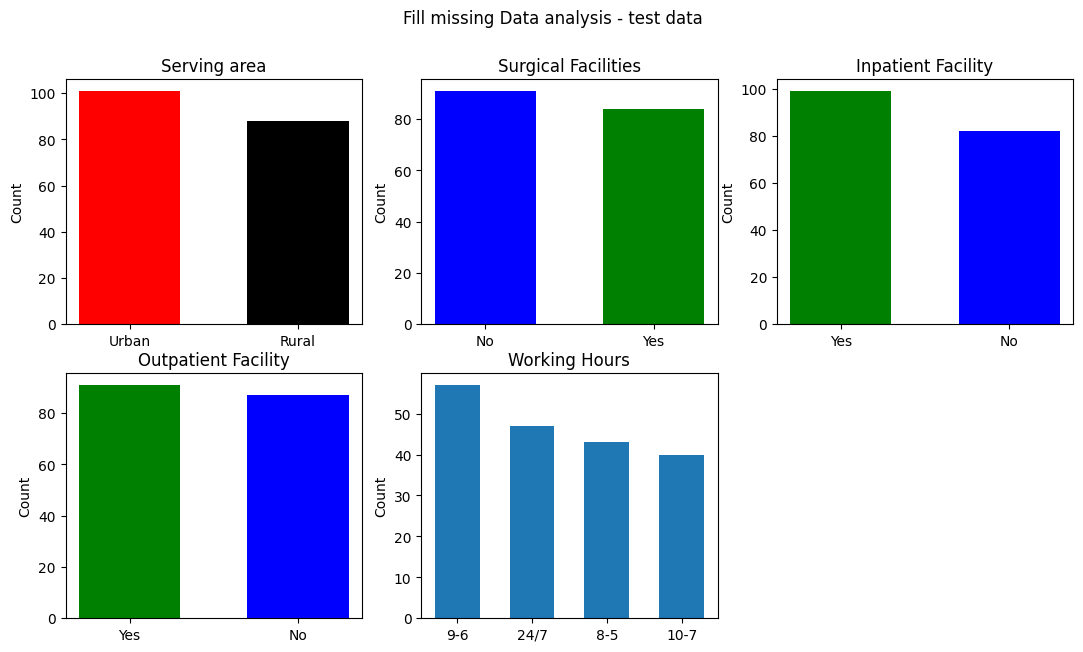

In [22]:
display(new_reg_test_data, "test data")

Most frequent serving area is Rural area for train data.

In [23]:
# filling out missing values with most frequent value: Rural, as data is binomial and nominal
new_reg_train_data['Serving area'].replace(np.NaN, "Rural", inplace=True)
new_reg_test_data['Serving area'].replace(np.NaN, "Rural", inplace=True)
print(new_reg_train_data['Serving area'].isna().sum())
new_reg_train_data['Serving area'].value_counts()

0


Rural    579
Urban    421
Name: Serving area, dtype: int64

In [24]:
new_reg_test_data['Serving area'].value_counts()

Urban    101
Rural     99
Name: Serving area, dtype: int64

In [25]:
# replacing serving area with most frequent value
new_reg_train_data['Serving area'] = new_reg_train_data['Serving area'].map({"Rural": 1, "Urban": 0})
new_reg_test_data['Serving area'] = new_reg_test_data['Serving area'].map({"Urban": 1, "Rural": 0})
new_reg_train_data.head()

,Hospital Type,Num of Doctors,Num of Staff,Num of Departments,Surgical Facilities,Working Hours,Inpatient Facility,Outpatient Facility,Serving Population,Serving area,Hospital Revenue
0,General hospital,133.0,290.0,10.0,No,10-7,No,No,NaN,1,1356885
1,General hospital,141.0,290.0,NaN,No,24/7,Yes,Yes,"200,000+",0,2584425
2,NaN,89.0,212.0,15.0,Yes,8-5,Yes,NaN,"100,000 - 150,000",1,4069519
3,Teaching hospital,81.0,249.0,15.0,No,9-6,Yes,No,NaN,1,2584425
4,Community hospital,141.0,353.0,21.0,Yes,9-6,Yes,Yes,"50,000 - 100,000",1,1781324


In [26]:
# filling missing values for Hospital Type per Serving area

# Grouping our trained data per Serving area
new_reg_train_data_copy = new_reg_train_data.copy()
new_reg_train_data_copy = new_reg_train_data_copy.groupby('Serving area')
# displaying the keys and values of grouped data
new_reg_train_data_copy.first()

,Hospital Type,Num of Doctors,Num of Staff,Num of Departments,Surgical Facilities,Working Hours,Inpatient Facility,Outpatient Facility,Serving Population,Hospital Revenue
Serving area,,,,,,,,,,
0,General hospital,141.0,290.0,15.0,No,24/7,Yes,Yes,"200,000+",2584425
1,General hospital,133.0,290.0,10.0,No,10-7,No,No,"100,000 - 150,000",1356885


In [27]:
# Urban area
# Getting the rows of data with Serving area as urban area and then getting the most frequent Hospital type column.
new_reg_train_data_copy.get_group(0)['Hospital Type'].value_counts()

Community hospital     81
General hospital       78
Children's hospital    77
Teaching hospital      70
Research hospital      68
Name: Hospital Type, dtype: int64

In [28]:
# Rural area
# Getting the rows of data with Serving area only as rural area and then getting the most frequent Hospital type column.
new_reg_train_data_copy.get_group(1)['Hospital Type'].value_counts()

Teaching hospital      118
Children's hospital    113
Community hospital     105
General hospital        97
Research hospital       91
Name: Hospital Type, dtype: int64

In [29]:
# Getting the count or frequency for Hospital Type for each Serving area. i.e Rural and Urban areas.
v1 = new_reg_train_data_copy.get_group(0)['Hospital Type'].value_counts()
v2 = new_reg_train_data_copy.get_group(1)['Hospital Type'].value_counts()
hsp_df_urb = pd.DataFrame(v1.values, columns=['URBAN'], index=v1.keys()).reset_index()
hsp_df_rural = pd.DataFrame(v2.values, columns=['RURAL'], index=v2.keys()).reset_index()
merged_df = hsp_df_urb.merge(hsp_df_rural, on='index')
merged_df.rename(columns={"index": "Hospital Type"}, inplace=True)
merged_df.set_index("Hospital Type", inplace=True)
merged_df

,URBAN,RURAL
Hospital Type,,
Community hospital,81,105
General hospital,78,97
Children's hospital,77,113
Teaching hospital,70,118
Research hospital,68,91


Text(0.5, 1.0, 'Hospital type data')

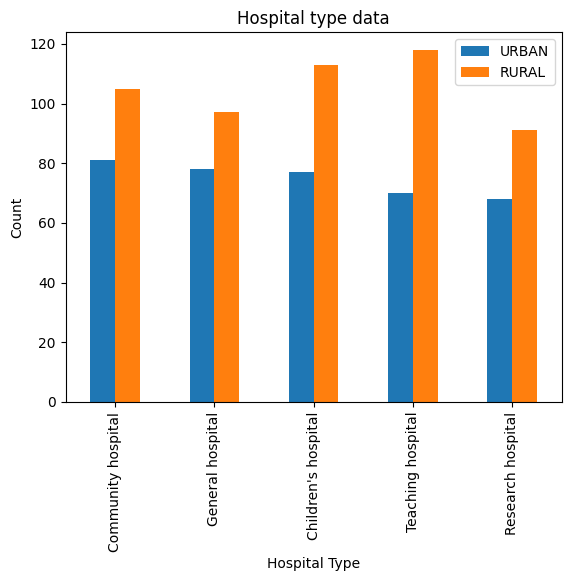

In [30]:
# plotting the graph for Hospital type frequency per Serving area(Rural or Urban).
merged_df.plot.bar()
plt.ylabel("Count")
plt.title("Hospital type data")

Train data:
The most frequent or common hospital in Urban area is "Community Hospital" and in Rural area is "Teaching hospital".

In [31]:
# finding out the index values for Hospital Type missing values
missing_idx = new_reg_train_data[new_reg_train_data["Hospital Type"].isna()].index
missing_idx

Int64Index([  2,   7,  21,  27,  30,  42,  57,  86,  93,  98,
            ...
            917, 929, 932, 963, 965, 971, 975, 978, 983, 996],
           dtype='int64', length=102)

In [32]:
# finding out the index values for Hospital Type missing values for test data
missing_idx_test = new_reg_test_data[new_reg_test_data["Hospital Type"].isna()].index
missing_idx_test

Int64Index([  4,  47,  52,  58,  74,  77,  84,  86,  89,  97, 101, 109, 127,
            129, 130, 137, 140, 141, 142, 150, 164, 174, 184],
           dtype='int64')

In [33]:
# replacing missing values of Hospital Type per each class (Serving area) - (Rural or Urban)
for i in missing_idx:
    if new_reg_train_data.loc[i, "Serving area"] == 1: # Rural
        new_reg_train_data.loc[i, "Hospital Type"] = "Teaching hospital"
    elif new_reg_train_data.loc[i, "Serving area"] == 0: # Urban
        new_reg_train_data.loc[i, "Hospital Type"] = "Community hospital"

# test data
for i in missing_idx_test:
    if new_reg_test_data.loc[i, "Serving area"] == 0: # Rural
        new_reg_test_data.loc[i, "Hospital Type"] = "Teaching hospital"
    elif new_reg_test_data.loc[i, "Serving area"] == 1: # Urban
        new_reg_test_data.loc[i, "Hospital Type"] = "Community hospital"

In [34]:
# One Hot Vectoring
def one_hot_vectoring(df, col):
    df_dumy = pd.get_dummies(df[col], prefix=col)
    df[df_dumy.columns] = df_dumy.astype("int64")
    df.drop(col, axis=1, inplace=True)
    return df

# As Hospital Type data is nominal and multinomial, hence performing one hot vectoring.
new_reg_train_data = one_hot_vectoring(new_reg_train_data, "Hospital Type")
new_reg_test_data = one_hot_vectoring(new_reg_test_data, "Hospital Type")
new_reg_train_data.head()

,Num of Doctors,Num of Staff,Num of Departments,Surgical Facilities,Working Hours,Inpatient Facility,Outpatient Facility,Serving Population,Serving area,Hospital Revenue,Hospital Type_Children's hospital,Hospital Type_Community hospital,Hospital Type_General hospital,Hospital Type_Research hospital,Hospital Type_Teaching hospital
0,133.0,290.0,10.0,No,10-7,No,No,NaN,1,1356885,0,0,1,0,0
1,141.0,290.0,NaN,No,24/7,Yes,Yes,"200,000+",0,2584425,0,0,1,0,0
2,89.0,212.0,15.0,Yes,8-5,Yes,NaN,"100,000 - 150,000",1,4069519,0,0,0,0,1
3,81.0,249.0,15.0,No,9-6,Yes,No,NaN,1,2584425,0,0,0,0,1
4,141.0,353.0,21.0,Yes,9-6,Yes,Yes,"50,000 - 100,000",1,1781324,0,1,0,0,0


In [35]:
# getting the frequency for each class for Surgical facilities
new_reg_train_data['Surgical Facilities'].value_counts()

No     456
Yes    447
Name: Surgical Facilities, dtype: int64

In [36]:
# filling na values with most frequent value or class: No
new_reg_train_data['Surgical Facilities'].replace(np.NaN, "No", inplace=True)
new_reg_test_data['Surgical Facilities'].replace(np.NaN, "No", inplace=True)
# replacing surgical facilities of yes as 0 and no as 1 as data is binomial
new_reg_train_data['Surgical Facilities'] = new_reg_train_data['Surgical Facilities'].map({"Yes": 0, "No": 1})
new_reg_train_data['Surgical Facilities'].head()

0    1
1    1
2    0
3    1
4    0
Name: Surgical Facilities, dtype: int64

In [37]:
# getting the frequency for each class for Inpatient Facility
new_reg_train_data['Inpatient Facility'].value_counts()

Yes    465
No     442
Name: Inpatient Facility, dtype: int64

In [38]:
# replacing inpatient facility nan with most frequent value: yes
new_reg_train_data['Inpatient Facility'].replace(np.NaN, "Yes", inplace=True)
new_reg_test_data['Inpatient Facility'].replace(np.NaN, "Yes", inplace=True)
print(new_reg_train_data['Inpatient Facility'].isna().sum())
# mapping categorical values of inpatient facility: yes with 1 and no with 0, as data is binomial
new_reg_train_data['Inpatient Facility'] = new_reg_train_data['Inpatient Facility'].map({"Yes":1, "No":0})
new_reg_train_data['Inpatient Facility'].head()

0


0    0
1    1
2    1
3    1
4    1
Name: Inpatient Facility, dtype: int64

In [39]:
# getting the frequency for each class for Outpatient Facility
new_reg_train_data['Outpatient Facility'].value_counts()

Yes    456
No     445
Name: Outpatient Facility, dtype: int64

In [40]:
# filling na values with most frequent value
new_reg_train_data['Outpatient Facility'].replace(np.NaN, "Yes", inplace=True)
new_reg_test_data['Outpatient Facility'].replace(np.NaN, "Yes", inplace=True)
print(new_reg_train_data['Outpatient Facility'].isna().sum())
# mapping Outpatient Facility values: yes with 1 and no with 0, as data is binomial
new_reg_train_data['Outpatient Facility'] = new_reg_train_data['Outpatient Facility'].map({"Yes":1, "No": 0})
new_reg_train_data['Outpatient Facility'].head()

0


0    0
1    1
2    1
3    0
4    1
Name: Outpatient Facility, dtype: int64

In [41]:
# getting the frequency for each class interval for Serving Population
new_reg_train_data['Serving Population'].value_counts()

100,000 - 150,000    243
50,000 - 100,000     229
150,000-200,000      213
200,000+             194
Name: Serving Population, dtype: int64

In [42]:
# getting the frequency for each class interval for Working Hours
new_reg_train_data['Working Hours'].value_counts()

8-5     241
24/7    227
9-6     216
10-7    208
Name: Working Hours, dtype: int64

Most of the hospitals are open in between 8 am to 5 pm timings.

In [43]:
# filling na values with most frequent value
new_reg_train_data['Working Hours'].replace(np.NaN, "8-5", inplace=True)
new_reg_test_data['Working Hours'].replace(np.NaN, "8-5", inplace=True)
new_reg_train_data.isna().sum()

Num of Doctors                        97
Num of Staff                          93
Num of Departments                    95
Surgical Facilities                    0
Working Hours                          0
Inpatient Facility                     0
Outpatient Facility                    0
Serving Population                   121
Serving area                           0
Hospital Revenue                       0
Hospital Type_Children's hospital      0
Hospital Type_Community hospital       0
Hospital Type_General hospital         0
Hospital Type_Research hospital        0
Hospital Type_Teaching hospital        0
dtype: int64

In [44]:
# replacing Working Hours data with numerical as data is ordinal and interval
def Func_Hours(df):
  df['Working Hours'].replace("8-5", 0, inplace=True)
  df['Working Hours'].replace("9-6", 1, inplace=True)
  df['Working Hours'].replace("10-7", 2, inplace=True)
  df['Working Hours'].replace("24/7", 3, inplace=True)
  return df

new_reg_train_data = Func_Hours(new_reg_train_data)
new_reg_test_data = Func_Hours(new_reg_test_data)

In [45]:
# Rural
# getting the frequency for each class for Serving population per Rural area class.
new_reg_train_data_copy.get_group(1)['Serving Population'].value_counts()

100,000 - 150,000    243
50,000 - 100,000     229
200,000+              23
150,000-200,000       18
Name: Serving Population, dtype: int64

In [46]:
# Urban
# getting the frequency for each class for Serving population per Urban area class.
new_reg_train_data_copy.get_group(0)['Serving Population'].value_counts()

150,000-200,000    195
200,000+           171
Name: Serving Population, dtype: int64

In [47]:
# Getting the count or frequency for Serving Population for each Serving area. i.e Rural and Urban areas.
v1 = new_reg_train_data_copy.get_group(0)['Serving Population'].value_counts()
v2 = new_reg_train_data_copy.get_group(1)['Serving Population'].value_counts()
hsp_df_urb = pd.DataFrame(v1.values, columns=['URBAN'], index=v1.keys()).reset_index()
hsp_df_rural = pd.DataFrame(v2.values, columns=['RURAL'], index=v2.keys()).reset_index()
hsp_df_urb.loc[len(hsp_df_urb)] = ['100,000 - 150,000', 0]
hsp_df_urb.loc[len(hsp_df_urb)] = ['50,000 - 100,000', 0]
merged_df = hsp_df_urb.merge(hsp_df_rural)
merged_df.rename(columns={"index": "population"}, inplace=True)
merged_df.set_index("population", inplace=True)
merged_df

,URBAN,RURAL
population,,
"150,000-200,000",195,18
"200,000+",171,23
"100,000 - 150,000",0,243
"50,000 - 100,000",0,229


Text(0.5, 1.0, 'Serving Population')

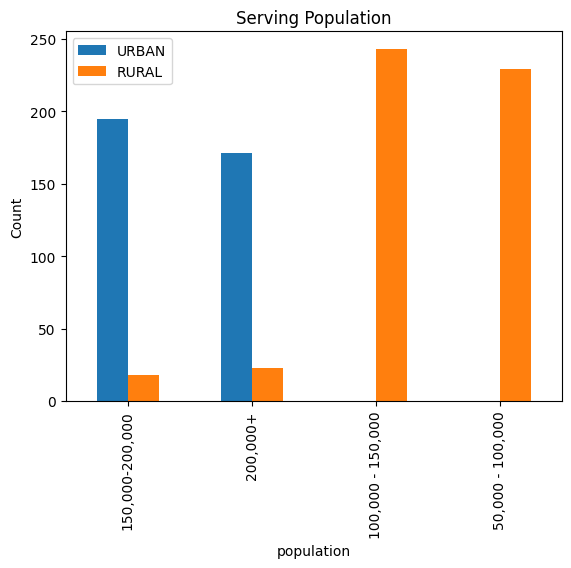

In [48]:
# plotting the graph for Serving population frequency per Serving area(Rural or Urban).
merged_df.plot.bar()
plt.ylabel("Count")
plt.title("Serving Population")

Train data:
Area of population that is served in rural area is 100,000 - 150,000 and in urban area is 150,000 - 200,000.

In [49]:
# finding the missing index values for Serving population
missing_idx = new_reg_train_data[new_reg_train_data["Serving Population"].isna()].index
missing_idx

Int64Index([  0,   3,  22,  25,  29,  36,  44,  47,  48,  68,
            ...
            942, 947, 954, 959, 962, 967, 973, 991, 992, 995],
           dtype='int64', length=121)

In [50]:
# finding the missing index values for Serving population test data
missing_idx_test = new_reg_test_data[new_reg_test_data["Serving Population"].isna()].index
missing_idx_test

Int64Index([ 23,  44,  48,  60,  61,  68,  82,  96, 113, 121, 127, 132, 133,
            160, 168, 170, 176, 185, 191, 199],
           dtype='int64')

In [51]:
# replacing missing values of Serving Population per each class (Serving area) - (Rural or Urban)
for i in missing_idx:
    if new_reg_train_data.loc[i, "Serving area"] == 1: # Rural
        new_reg_train_data.loc[i, "Serving Population"] = "100,000 - 150,000"
    elif new_reg_train_data.loc[i, "Serving area"] == 0: # Urban
        new_reg_train_data.loc[i, "Serving Population"] = "150,000-200,000"

#test data
for i in missing_idx_test:
    if new_reg_test_data.loc[i, "Serving area"] == 0: # Rural
        new_reg_test_data.loc[i, "Serving Population"] = "100,000 - 150,000"
    elif new_reg_test_data.loc[i, "Serving area"] == 1: # Urban
        new_reg_test_data.loc[i, "Serving Population"] = "150,000-200,000"

In [52]:
# replacing data with numerical as data is ordinal and interval
def Func_Popln(df):
  df['Serving Population'].replace("50,000 - 100,000", 0, inplace=True)
  df['Serving Population'].replace("100,000 - 150,000", 1, inplace=True)
  df['Serving Population'].replace("150,000-200,000", 2, inplace=True)
  df['Serving Population'].replace("200,000+", 3, inplace=True)
  df['Serving Population'] = df['Serving Population'].astype(int)
  return df

new_reg_train_data = Func_Popln(new_reg_train_data)
new_reg_test_data = Func_Popln(new_reg_test_data)

<AxesSubplot: ylabel='Density'>

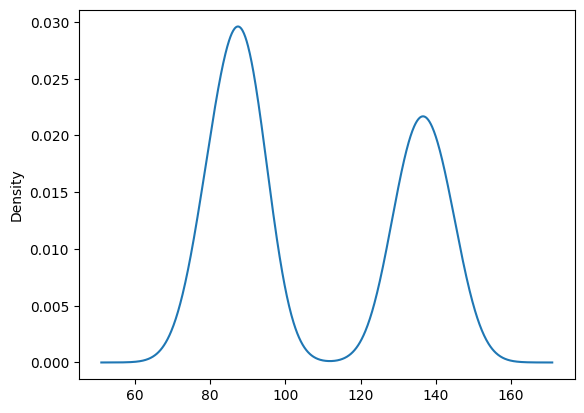

In [53]:
# plotting the kernel density estimator distribution for Num of Doctors
new_reg_train_data['Num of Doctors'].plot(kind='kde')

<AxesSubplot: ylabel='Density'>

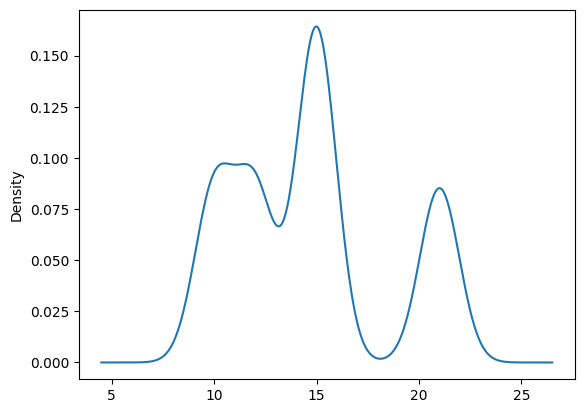

In [54]:
# plotting the kernel density estimator distribution for Num of Departments
new_reg_train_data['Num of Departments'].plot(kind='kde')

<AxesSubplot: ylabel='Density'>

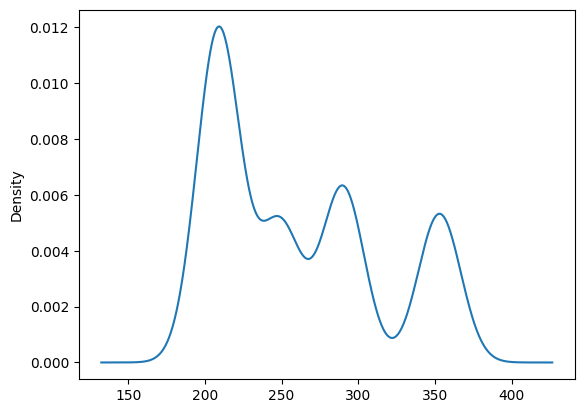

In [55]:
# plotting the kernel density estimator distribution for Num of Staff
new_reg_train_data['Num of Staff'].plot(kind='kde')

In [56]:
# As the data is skewed for 3 features in above plots, we will replace missing data with median of the data
new_reg_train_data['Num of Doctors'].replace(np.NaN, new_reg_train_data['Num of Doctors'].median(), inplace=True)
new_reg_train_data['Num of Staff'].replace(np.NaN, new_reg_train_data['Num of Staff'].median(), inplace=True)
new_reg_train_data['Num of Departments'].replace(np.NaN, new_reg_train_data['Num of Departments'].median(), inplace=True)

#test data
new_reg_test_data['Num of Doctors'].replace(np.NaN, new_reg_train_data['Num of Doctors'].median(), inplace=True)
new_reg_test_data['Num of Staff'].replace(np.NaN, new_reg_train_data['Num of Staff'].median(), inplace=True)
new_reg_test_data['Num of Departments'].replace(np.NaN, new_reg_train_data['Num of Departments'].median(), inplace=True)
new_reg_train_data.isna().sum()

Num of Doctors                       0
Num of Staff                         0
Num of Departments                   0
Surgical Facilities                  0
Working Hours                        0
Inpatient Facility                   0
Outpatient Facility                  0
Serving Population                   0
Serving area                         0
Hospital Revenue                     0
Hospital Type_Children's hospital    0
Hospital Type_Community hospital     0
Hospital Type_General hospital       0
Hospital Type_Research hospital      0
Hospital Type_Teaching hospital      0
dtype: int64

In [57]:
new_reg_train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Num of Doctors                     1000 non-null   float64
 1   Num of Staff                       1000 non-null   float64
 2   Num of Departments                 1000 non-null   float64
 3   Surgical Facilities                1000 non-null   int64  
 4   Working Hours                      1000 non-null   int64  
 5   Inpatient Facility                 1000 non-null   int64  
 6   Outpatient Facility                1000 non-null   int64  
 7   Serving Population                 1000 non-null   int32  
 8   Serving area                       1000 non-null   int64  
 9   Hospital Revenue                   1000 non-null   int64  
 10  Hospital Type_Children's hospital  1000 non-null   int64  
 11  Hospital Type_Community hospital   1000 non-null   int64 

We can see that, our whole train data is completely now preprocessed and there are no null values and all the data attributes are being converted into numerical values for analyzing the different models.

In [58]:
# converting the Hospital Revenue data into integer.
new_reg_train_data['Hospital Revenue'] = new_reg_train_data['Hospital Revenue'].astype(int)

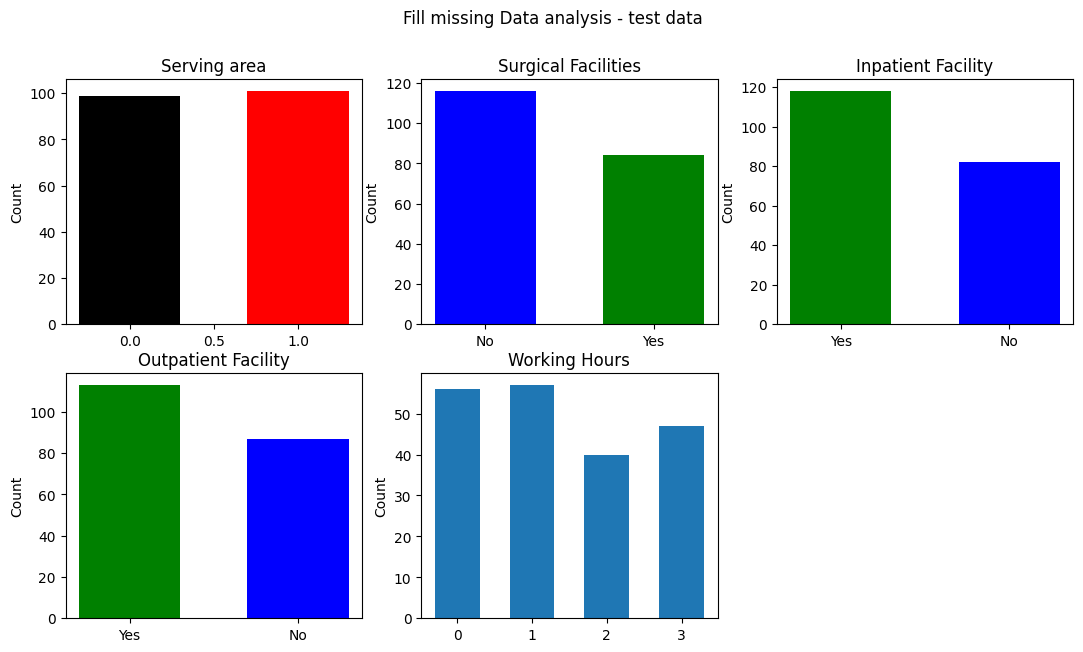

In [59]:
# getting the frequency distribution of test data 
display(new_reg_test_data, "test data")

In [60]:
# replacing the categorical values with numerical values based on most frequent value as data is binary.
new_reg_test_data['Outpatient Facility'] = new_reg_test_data['Outpatient Facility'].map({"Yes":1, "No":0})
new_reg_test_data['Surgical Facilities'] = new_reg_test_data['Surgical Facilities'].map({"Yes":0, "No":1})
new_reg_test_data['Inpatient Facility'] = new_reg_test_data['Inpatient Facility'].map({"Yes":1, "No":0})

In [61]:
new_reg_test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Num of Doctors                     200 non-null    float64
 1   Num of Staff                       200 non-null    float64
 2   Num of Departments                 200 non-null    float64
 3   Surgical Facilities                200 non-null    int64  
 4   Working Hours                      200 non-null    int64  
 5   Inpatient Facility                 200 non-null    int64  
 6   Outpatient Facility                200 non-null    int64  
 7   Serving Population                 200 non-null    int32  
 8   Serving area                       200 non-null    int64  
 9   Hospital Type_Children's hospital  200 non-null    int64  
 10  Hospital Type_Community hospital   200 non-null    int64  
 11  Hospital Type_General hospital     200 non-null    int64  

Now, we can see that, our test data is also completely preprocessed, with 0 null values and all categorical values are being converted to numerical.

In [62]:
# checking duplicates

print("Train duplicated rows:", new_reg_train_data.duplicated().sum())
print("Test duplicated rows:", new_reg_test_data.duplicated().sum())

Train duplicated rows: 0
Test duplicated rows: 0


<b> Removing Outliers </b>

Num of Doctors                          AxesSubplot(0.125,0.747241;0.133621x0.132759)
Num of Staff                         AxesSubplot(0.285345,0.747241;0.133621x0.132759)
Num of Departments                    AxesSubplot(0.44569,0.747241;0.133621x0.132759)
Surgical Facilities                  AxesSubplot(0.606034,0.747241;0.133621x0.132759)
Working Hours                        AxesSubplot(0.766379,0.747241;0.133621x0.132759)
Inpatient Facility                      AxesSubplot(0.125,0.587931;0.133621x0.132759)
Outpatient Facility                  AxesSubplot(0.285345,0.587931;0.133621x0.132759)
Serving Population                    AxesSubplot(0.44569,0.587931;0.133621x0.132759)
Serving area                         AxesSubplot(0.606034,0.587931;0.133621x0.132759)
Hospital Revenue                     AxesSubplot(0.766379,0.587931;0.133621x0.132759)
Hospital Type_Children's hospital       AxesSubplot(0.125,0.428621;0.133621x0.132759)
Hospital Type_Community hospital     AxesSubplot(0.285

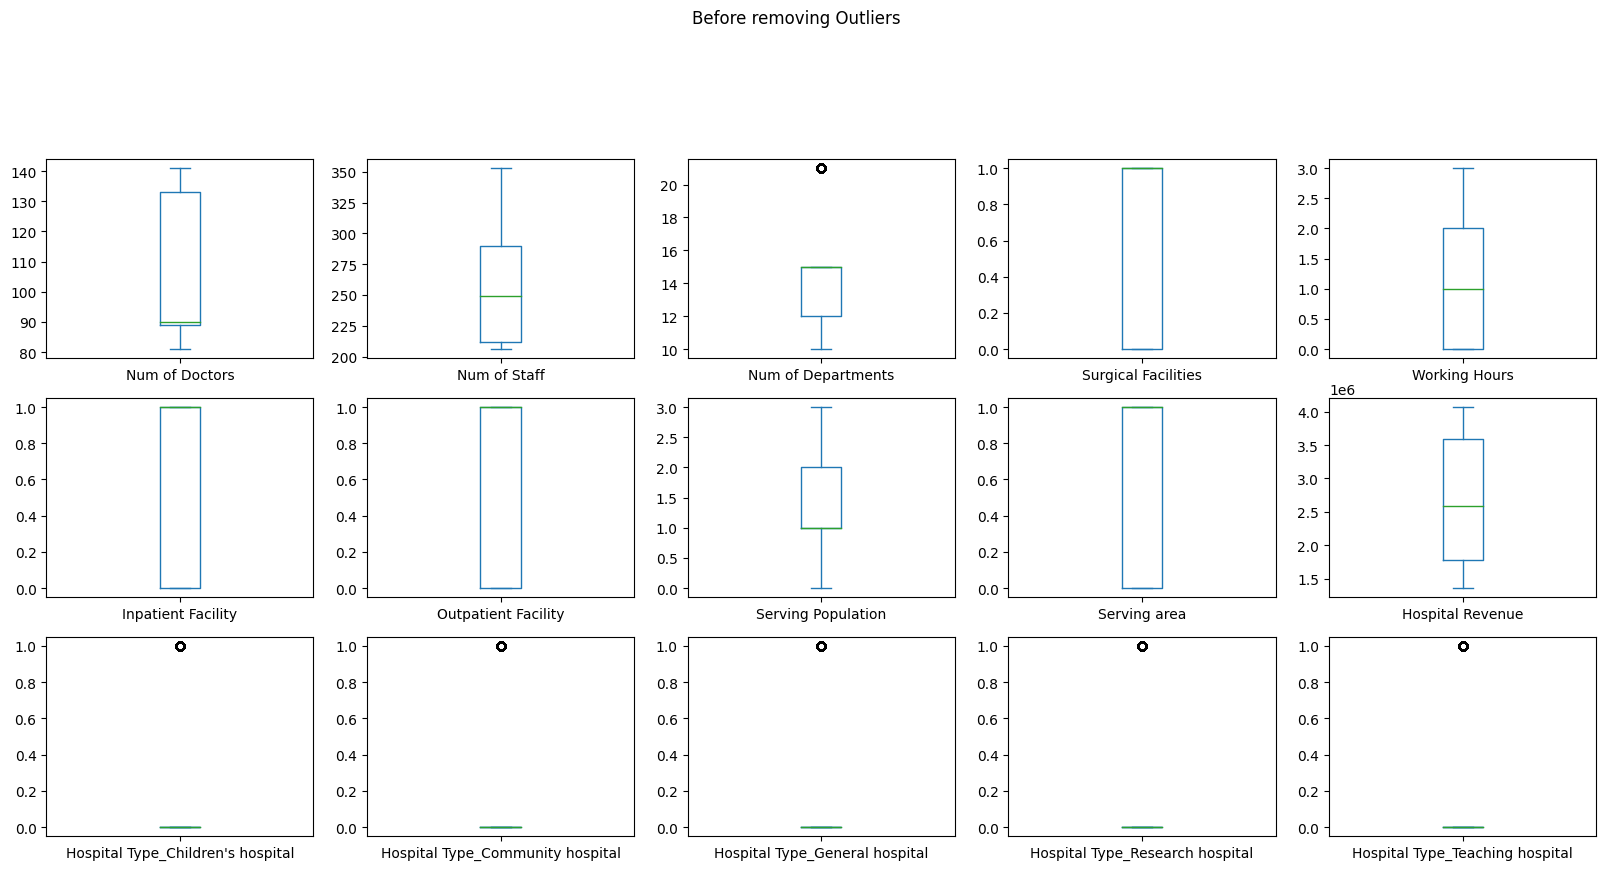

In [63]:
import matplotlib.pyplot as plt
import numpy as np
 
# function for plotting the outliers using box plot 
def outliers_display(df): 
  plt.rcParams["figure.figsize"] = [2.50, 2.50]
  plt.rcParams["figure.autolayout"] = True

  for x in df.columns:
    ax = df[x].plot(kind='box', title='boxplot')
    plt.show()

# outliers_display(new_reg_train_data)
# plotting the outliers with help of box plot for whole dataset and making subplots as true before removing them.
new_reg_train_data.plot(subplots=True, kind="box", layout=(5,5), sharex=False, sharey=False, figsize=(20,15), title = "Before removing Outliers")

In [64]:
# function for removing outliers (data points, which are completely apart from other data points)
def outliers_removal(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    return df[(df[col] >= Q1 - 1.5*IQR) & (df[col] <= Q3 + 1.5*IQR)]


In [65]:
# removing outliers for each column
for x in new_reg_train_data.columns:
  new_reg_train_data = outliers_removal(new_reg_train_data, x)

Num of Doctors                          AxesSubplot(0.125,0.747241;0.133621x0.132759)
Num of Staff                         AxesSubplot(0.285345,0.747241;0.133621x0.132759)
Num of Departments                    AxesSubplot(0.44569,0.747241;0.133621x0.132759)
Surgical Facilities                  AxesSubplot(0.606034,0.747241;0.133621x0.132759)
Working Hours                        AxesSubplot(0.766379,0.747241;0.133621x0.132759)
Inpatient Facility                      AxesSubplot(0.125,0.587931;0.133621x0.132759)
Outpatient Facility                  AxesSubplot(0.285345,0.587931;0.133621x0.132759)
Serving Population                    AxesSubplot(0.44569,0.587931;0.133621x0.132759)
Serving area                         AxesSubplot(0.606034,0.587931;0.133621x0.132759)
Hospital Revenue                     AxesSubplot(0.766379,0.587931;0.133621x0.132759)
Hospital Type_Children's hospital       AxesSubplot(0.125,0.428621;0.133621x0.132759)
Hospital Type_Community hospital     AxesSubplot(0.285

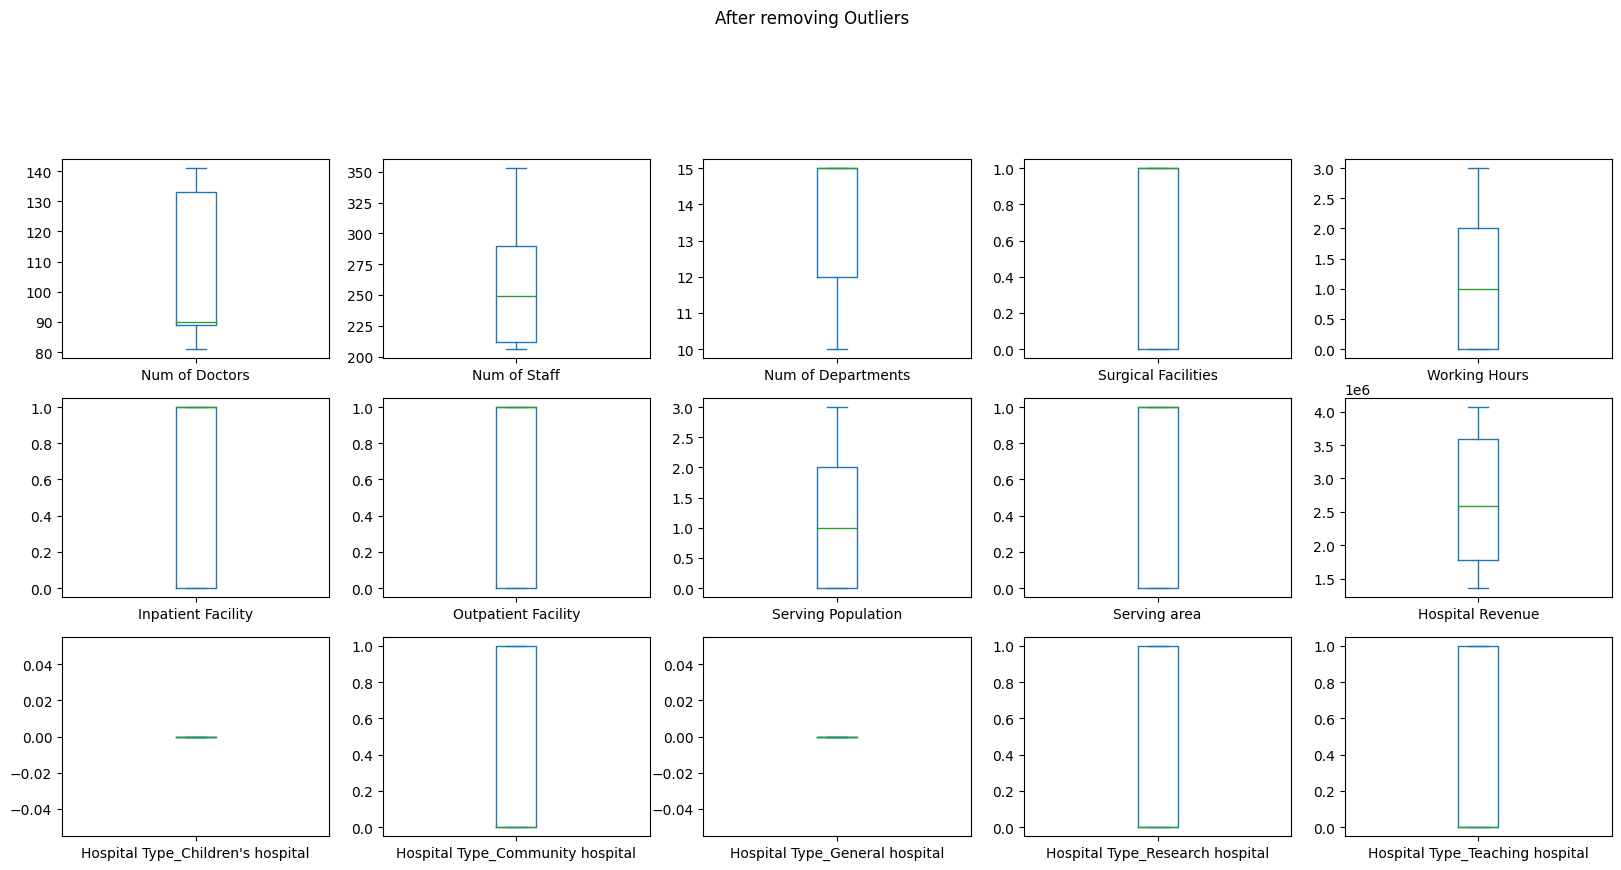

In [66]:
# plotting the outliers with help of box plot for whole dataset and making subplots as true after removing them.
new_reg_train_data.plot(subplots=True, kind="box", layout=(5,5), sharex=False, sharey=False, figsize=(20,15), title = "After removing Outliers")

Num of Doctors                          AxesSubplot(0.125,0.747241;0.133621x0.132759)
Num of Staff                         AxesSubplot(0.285345,0.747241;0.133621x0.132759)
Num of Departments                    AxesSubplot(0.44569,0.747241;0.133621x0.132759)
Surgical Facilities                  AxesSubplot(0.606034,0.747241;0.133621x0.132759)
Working Hours                        AxesSubplot(0.766379,0.747241;0.133621x0.132759)
Inpatient Facility                      AxesSubplot(0.125,0.587931;0.133621x0.132759)
Outpatient Facility                  AxesSubplot(0.285345,0.587931;0.133621x0.132759)
Serving Population                    AxesSubplot(0.44569,0.587931;0.133621x0.132759)
Serving area                         AxesSubplot(0.606034,0.587931;0.133621x0.132759)
Hospital Type_Children's hospital    AxesSubplot(0.766379,0.587931;0.133621x0.132759)
Hospital Type_Community hospital        AxesSubplot(0.125,0.428621;0.133621x0.132759)
Hospital Type_General hospital       AxesSubplot(0.285

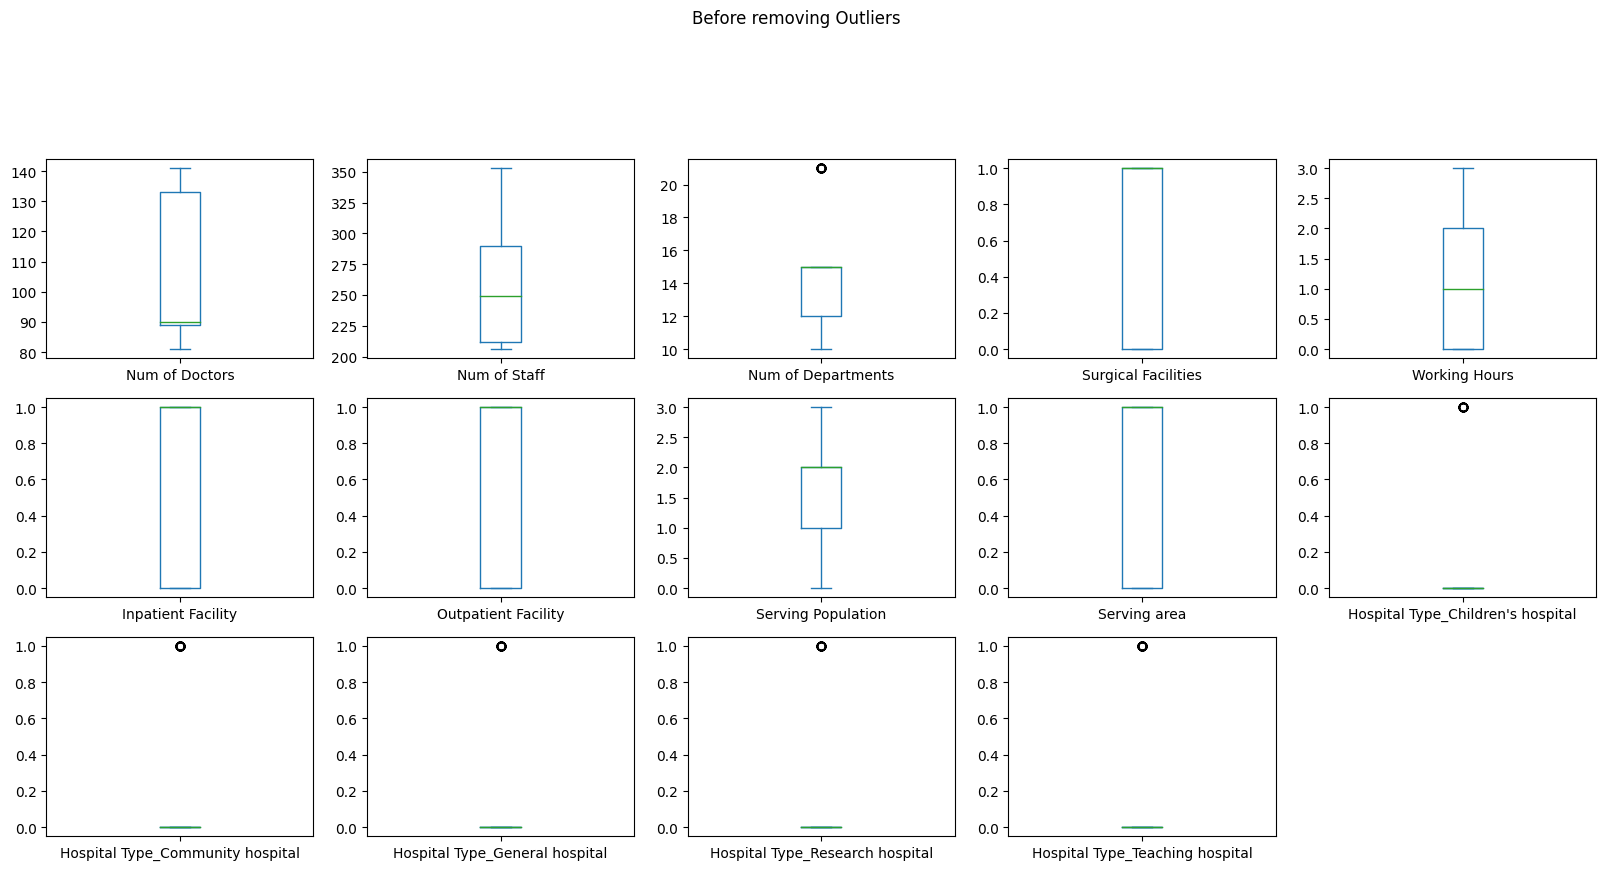

In [67]:
# test data
# plotting the outliers with help of box plot for whole dataset and making subplots as true before removing them for test data.
new_reg_test_data.plot(subplots=True, kind="box", layout=(5,5), sharex=False, sharey=False, figsize=(20,15), title = "Before removing Outliers")

In [68]:
# removing outliers for each column of test data
for x in new_reg_test_data.columns:
  new_reg_test_data = outliers_removal(new_reg_test_data, x)

Num of Doctors                          AxesSubplot(0.125,0.747241;0.133621x0.132759)
Num of Staff                         AxesSubplot(0.285345,0.747241;0.133621x0.132759)
Num of Departments                    AxesSubplot(0.44569,0.747241;0.133621x0.132759)
Surgical Facilities                  AxesSubplot(0.606034,0.747241;0.133621x0.132759)
Working Hours                        AxesSubplot(0.766379,0.747241;0.133621x0.132759)
Inpatient Facility                      AxesSubplot(0.125,0.587931;0.133621x0.132759)
Outpatient Facility                  AxesSubplot(0.285345,0.587931;0.133621x0.132759)
Serving Population                    AxesSubplot(0.44569,0.587931;0.133621x0.132759)
Serving area                         AxesSubplot(0.606034,0.587931;0.133621x0.132759)
Hospital Type_Children's hospital    AxesSubplot(0.766379,0.587931;0.133621x0.132759)
Hospital Type_Community hospital        AxesSubplot(0.125,0.428621;0.133621x0.132759)
Hospital Type_General hospital       AxesSubplot(0.285

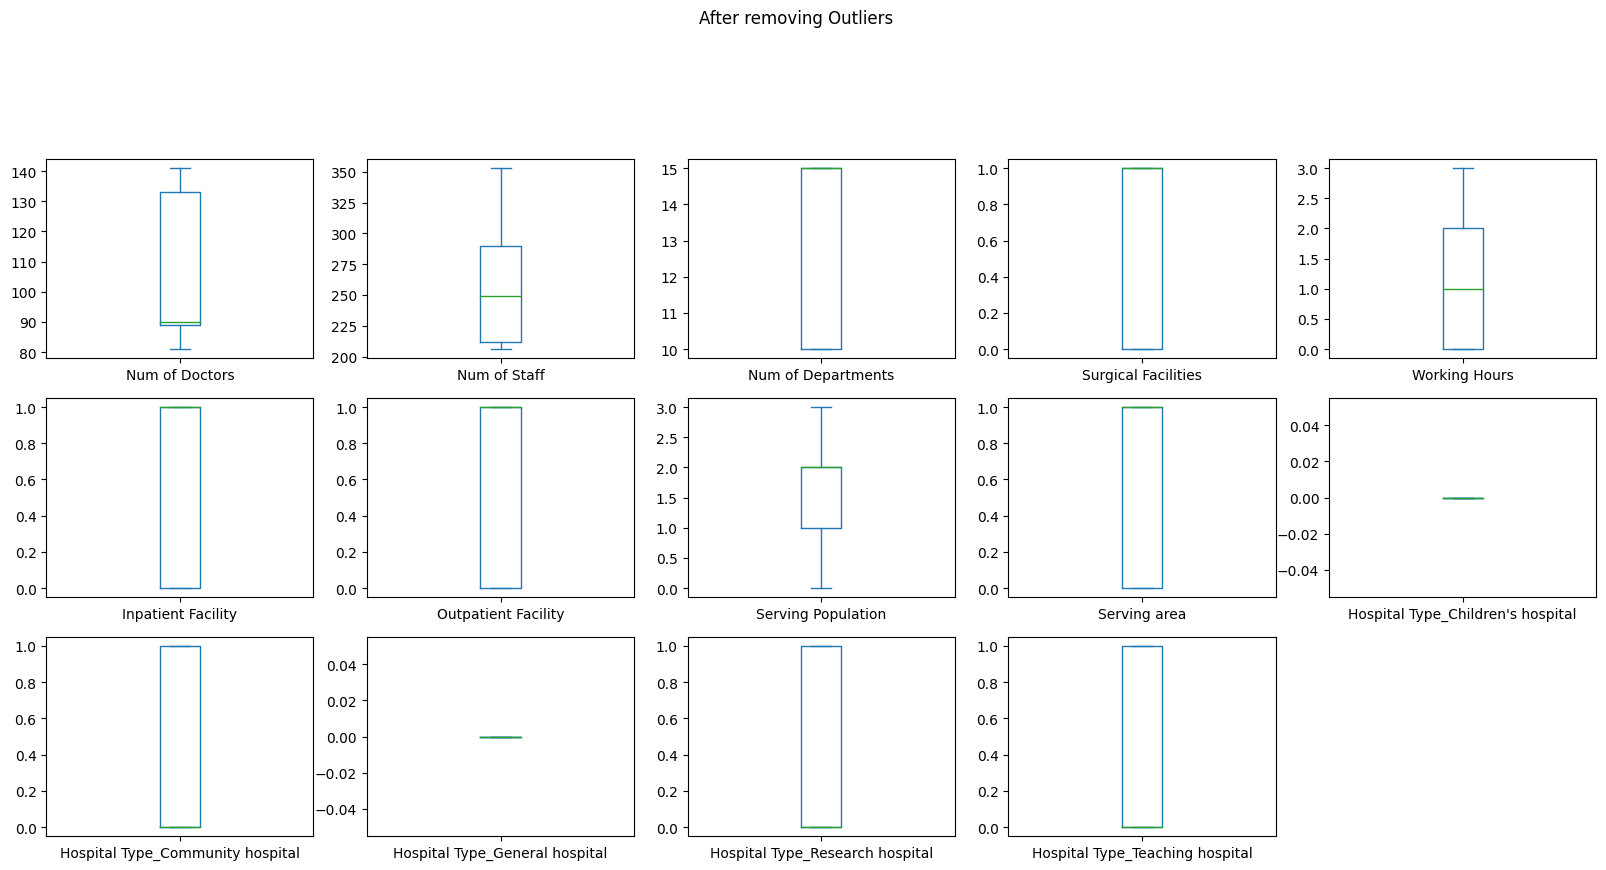

In [69]:
# plotting the outliers with help of box plot for whole dataset and making subplots as true after removing them.
new_reg_test_data.plot(subplots=True, kind="box", layout=(5,5), sharex=False, sharey=False, figsize=(20,15), title = "After removing Outliers")

In [70]:
new_reg_train_data.head()

,Num of Doctors,Num of Staff,Num of Departments,Surgical Facilities,Working Hours,Inpatient Facility,Outpatient Facility,Serving Population,Serving area,Hospital Revenue,Hospital Type_Children's hospital,Hospital Type_Community hospital,Hospital Type_General hospital,Hospital Type_Research hospital,Hospital Type_Teaching hospital
2,89.0,212.0,15.0,0,0,1,1,1,1,4069519,0,0,0,0,1
3,81.0,249.0,15.0,1,1,1,0,1,1,2584425,0,0,0,0,1
7,89.0,249.0,10.0,0,2,1,0,0,1,1781324,0,0,0,0,1
10,141.0,206.0,15.0,0,3,1,1,2,1,1781324,0,0,0,0,1
12,81.0,249.0,15.0,1,3,0,1,0,1,1356885,0,1,0,0,0


### Clustering model

In [71]:
X_train, X_test = new_reg_train_data, new_reg_test_data

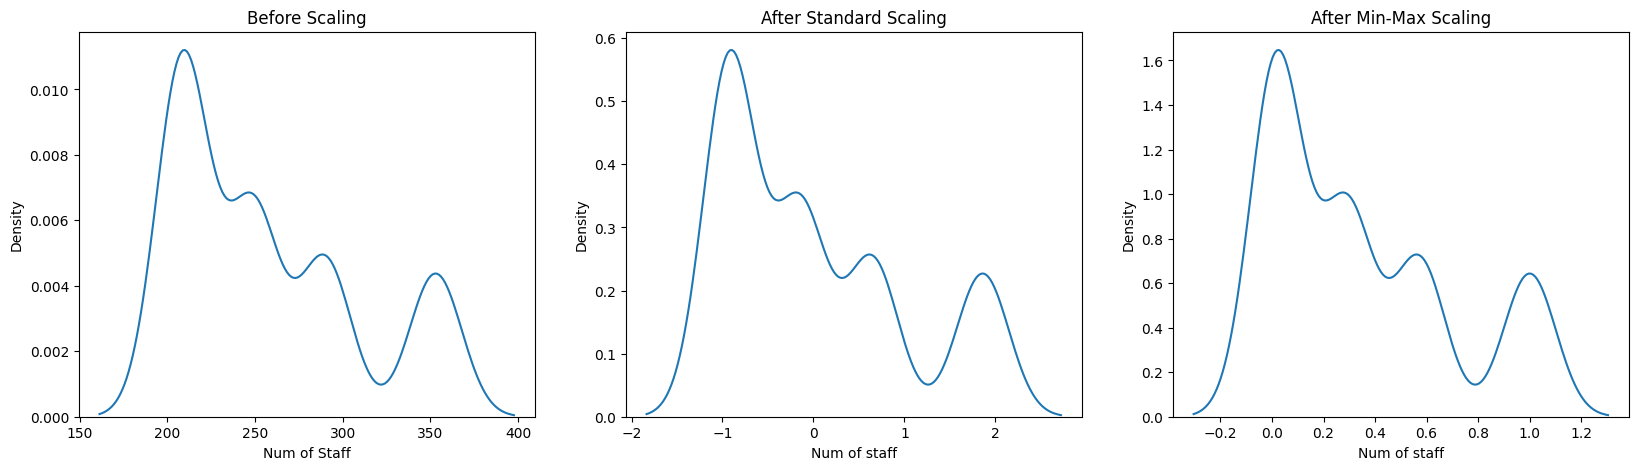

In [72]:
# Scaling the data with help of MinMaxScaling and Standard Scaling
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import seaborn as sns

scaler = MinMaxScaler()
X_scaled_min_max = scaler.fit_transform(X_train)
X_scaled_min_max_df = pd.DataFrame(X_scaled_min_max, columns=new_reg_train_data.columns)

scaler = StandardScaler()
X_scaled_std = scaler.fit_transform(X_train)
X_scaled_std_df = pd.DataFrame(X_scaled_std, columns=new_reg_train_data.columns)

fig, (ax1, ax2, ax3) = plt.subplots(ncols = 3, figsize =(20, 5))
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['Num of Staff'], ax = ax1)

ax2.set_title('After Standard Scaling')
ax2.set_xlabel("Num of staff")
sns.kdeplot(X_scaled_std[:, 1], ax = ax2)

ax3.set_title('After Min-Max Scaling')
ax3.set_xlabel("Num of staff")
sns.kdeplot(X_scaled_min_max[:, 1], ax = ax3)
plt.show()

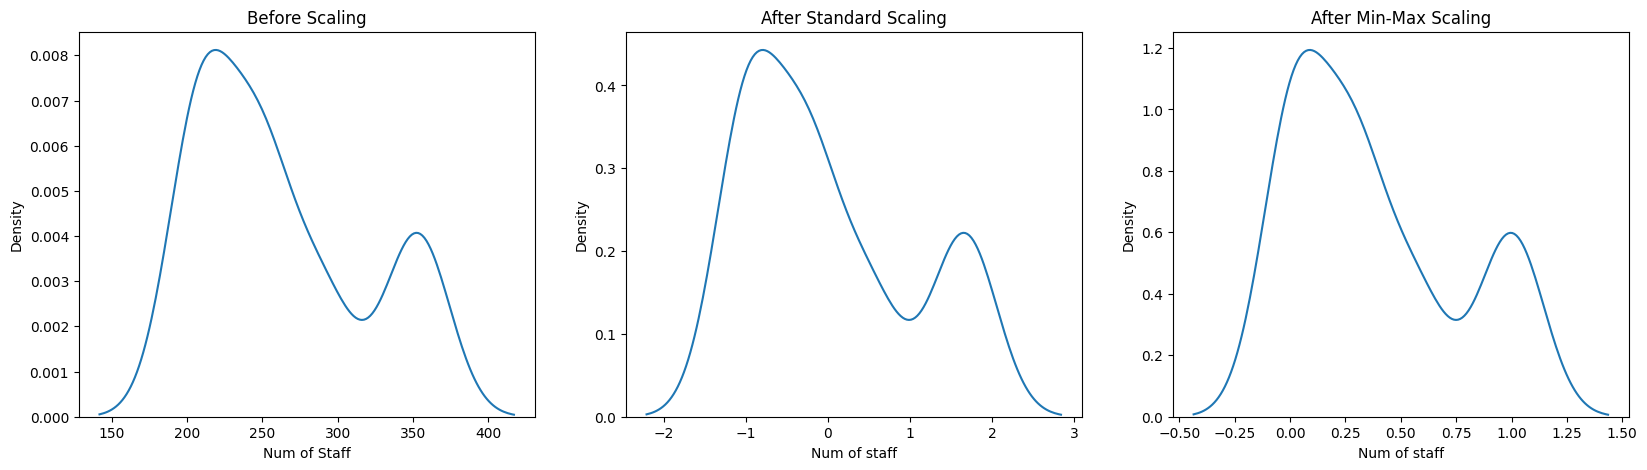

In [73]:
# Scaling the test data with help of MinMaxScaling and Standard Scaling

scaler = MinMaxScaler()
X_scaled_min_max_test = scaler.fit_transform(X_test)
X_scaled_min_max_df_test = pd.DataFrame(X_scaled_min_max_test, columns=new_reg_test_data.columns)

scaler = StandardScaler()
X_scaled_std_test = scaler.fit_transform(X_test)
X_scaled_std_df_test = pd.DataFrame(X_scaled_std_test, columns=new_reg_test_data.columns)

fig, (ax1, ax2, ax3) = plt.subplots(ncols = 3, figsize =(20, 5))
ax1.set_title('Before Scaling')
sns.kdeplot(X_test['Num of Staff'], ax = ax1)

ax2.set_title('After Standard Scaling')
ax2.set_xlabel("Num of staff")
sns.kdeplot(X_scaled_std_test[:, 1], ax = ax2)

ax3.set_title('After Min-Max Scaling')
ax3.set_xlabel("Num of staff")
sns.kdeplot(X_scaled_min_max_test[:, 1], ax = ax3)
plt.show()

Comparing the scaling techniques on our clustering model for selecting one of them, based on silhouette score and number of clusters

In [74]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
model = AgglomerativeClustering(distance_threshold = 10, n_clusters = None, 
                                linkage = 'ward')

# Train the model
model = model.fit(X_scaled_min_max_df)
print(model.n_clusters_)
silhouette_score(X_scaled_min_max_df, model.labels_)

5


0.16277203638267093

In [75]:
model = AgglomerativeClustering(distance_threshold = 10, n_clusters = None, 
                                linkage = 'ward')

# Train the model
model = model.fit(X_scaled_std_df)
print(model.n_clusters_)
silhouette_score(X_scaled_std_df, model.labels_)

18


0.09894470510389669

From the above analysis of data, we select min max scaling, as we can see after scaling the data, there are no much variations in the graph. So, after performing the clustering with above two scaled data with distance threshold as 10. We get nclusters as 5 for min max and 18 for standard scaled data. Also the silhouette score for min-max is 0.16 and for standard is 0.09. After comparing the results, we choose <b>min-max scaling</b>, based on silhouette score and also nclusters. With standard scaling, the values are also scaled to be large, which creates problem while clustering.

<b> Agglomerative Clustering </b>

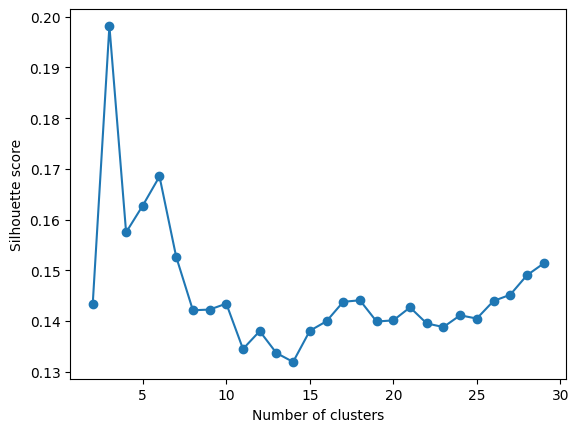

In [76]:
silhouette_scores = []
# Analyzing the Clustering for getting the n clusters by performing clustering with n clusters in range of 2 to 30
for n_clusters in range(2, 30):
    clusterer = AgglomerativeClustering(n_clusters=n_clusters)
    cluster_labels = clusterer.fit_predict(X_scaled_min_max_df)
    silhouette_scores.append(silhouette_score(X_scaled_min_max_df, cluster_labels))

# Plot the silhouette scores for different number of clusters
import matplotlib.pyplot as plt
plt.plot(range(2, 30), silhouette_scores, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.show()

In [77]:
# Performing clustering with distance threshold
model = AgglomerativeClustering(distance_threshold = 17, n_clusters = None, 
                                linkage = 'ward')

# Train the model
model = model.fit(X_scaled_min_max_df)
model.n_clusters_

3

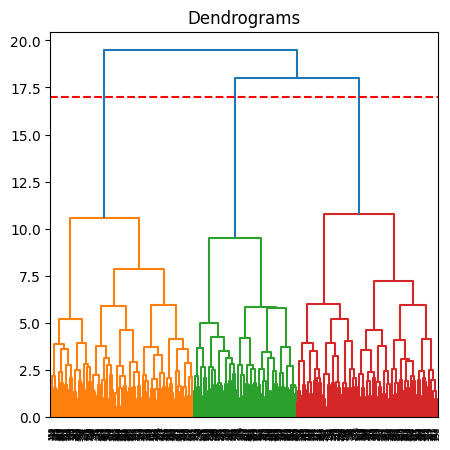

In [78]:
# Plotting the dendogram to get the distance threshold for our clustering model
from scipy.cluster.hierarchy import dendrogram, linkage

plt.subplots(figsize = (5,5))
plt.title("Dendrograms")
dendrogram(linkage(X_scaled_min_max_df, method = 'ward'))
plt.axhline(y = 17, c = 'r', linestyle = '--')

plt.show()

From the above dendograms and line chart, we can summarise that, at distance threshold in between 12 to 17.5 and 3 as n_clusters, we get optimal number of clusters based on silhouette score. 

In [79]:
# Performing the clustering with our n clusters and ward linkage
model = AgglomerativeClustering(n_clusters = 3, affinity='euclidean', linkage='ward')

# Train the model
model = model.fit(X_scaled_min_max_df)
model.labels_

array([1, 1, 1, 1, 0, 2, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 2, 1, 0, 1, 1,
       1, 2, 2, 0, 1, 1, 1, 1, 0, 2, 2, 0, 0, 1, 0, 0, 0, 1, 1, 0, 2, 2,
       1, 0, 2, 0, 1, 0, 2, 1, 1, 1, 1, 0, 1, 1, 2, 1, 1, 0, 0, 0, 2, 0,
       1, 1, 0, 2, 0, 0, 1, 2, 2, 2, 1, 0, 1, 2, 2, 2, 0, 0, 0, 0, 1, 0,
       0, 0, 2, 2, 2, 2, 0, 0, 2, 2, 1, 0, 0, 2, 2, 2, 2, 1, 0, 0, 1, 1,
       2, 1, 2, 1, 1, 1, 0, 0, 1, 1, 2, 1, 2, 0, 1, 2, 1, 0, 2, 0, 0, 0,
       2, 0, 2, 1, 1, 0, 2, 0, 1, 0, 2, 0, 0, 0, 1, 2, 2, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 2, 1, 2, 2, 0, 0, 2, 1, 1,
       0, 0, 0, 0, 2, 1, 0, 1, 0, 2, 0, 0, 1, 0, 1, 0, 0, 2, 0, 1, 0, 2,
       2, 2, 0, 1, 2, 1, 0, 1, 1, 2, 1, 1, 2, 2, 0, 2, 0, 0, 2, 0, 0, 0,
       2, 0, 1, 2, 0, 0, 0, 0, 0, 2, 2, 2, 1, 0, 2, 2, 2, 0, 1, 2, 2, 0,
       1, 1, 2, 1, 2, 1, 0, 0, 1, 1, 1, 2, 1, 2, 0, 0, 2, 2, 1, 0, 0, 2,
       1, 0, 2, 0, 1, 0, 2, 2, 1, 0, 1, 0, 2, 0, 1, 2, 0, 2, 2, 1, 1, 0,
       1, 1, 0, 1, 1, 2, 2, 1, 2, 1, 1, 0, 0, 0, 1,

In [80]:
# getting silhouette score
agg_sil = silhouette_score(X_scaled_min_max_df, model.labels_)
agg_sil

0.19819704143605657

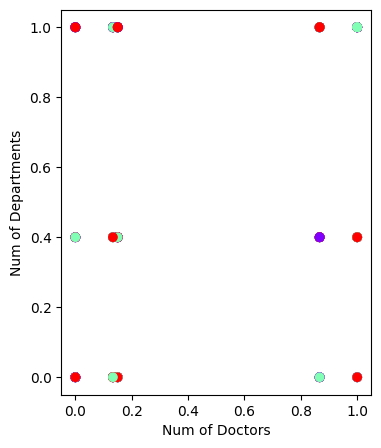

In [81]:
# plotting the clusters with their centroids for agglomerative clustering

ac = AgglomerativeClustering(n_clusters = 3)
ac.fit(X_scaled_min_max)
agg_pred = ac.labels_

plt.figure(figsize =(4, 5))
plt.scatter(X_scaled_min_max_df["Num of Doctors"], X_scaled_min_max_df["Num of Departments"],
           c = agg_pred, cmap ='rainbow')
plt.xlabel('Num of Doctors')
plt.ylabel('Num of Departments')
plt.show()

<b> K Means Clustering </b>

Text(0.5, 1.0, 'Clusters vs SSE')

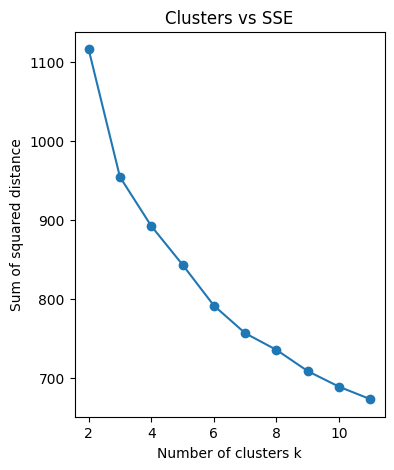

In [82]:
# processing our model with the help of elbow method, to find the best value for K. by training our model by k means clustering.
from sklearn.cluster import KMeans
sse = []
list_k = list(range(2, 12))

for k in list_k:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_scaled_min_max_df)
    sse.append(km.inertia_)

# Plot sse against k
plt.figure(figsize=(4, 5))
plt.plot(list_k, sse, '-o')
plt.xlabel(r'Number of clusters k')
plt.ylabel('Sum of squared distance')
plt.title('Clusters vs SSE')

Based on Elbow method, we can see that the curve elbows at value 3. Hence number of clusters we choose are 3.

In [83]:
# TRAINING THE DATA FOR K = 3

kmeans = KMeans(3, init = 'k-means++', random_state = 0, max_iter=24)
kmeans.fit(X_scaled_min_max_df)

KMeans(max_iter=24, n_clusters=3, random_state=0)

In [84]:
predictions = kmeans.predict(X_scaled_min_max_df) # predicting the values for K means
predictions

array([1, 1, 1, 1, 0, 2, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 2, 1, 0, 1, 1,
       1, 2, 2, 0, 1, 1, 1, 1, 0, 2, 2, 0, 0, 1, 0, 0, 0, 1, 1, 0, 2, 2,
       1, 0, 2, 0, 1, 0, 2, 1, 1, 1, 1, 0, 1, 1, 2, 1, 1, 0, 0, 0, 2, 0,
       1, 1, 0, 2, 0, 0, 1, 2, 2, 2, 1, 0, 1, 2, 2, 2, 0, 0, 0, 0, 1, 0,
       0, 0, 2, 2, 2, 2, 0, 0, 2, 2, 1, 0, 0, 2, 2, 2, 2, 1, 0, 0, 1, 1,
       2, 1, 2, 1, 1, 1, 0, 0, 1, 1, 2, 1, 2, 0, 1, 2, 1, 0, 2, 0, 0, 0,
       2, 0, 2, 1, 1, 0, 2, 0, 1, 0, 2, 0, 0, 0, 1, 2, 2, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 2, 1, 2, 2, 0, 0, 2, 1, 1,
       0, 0, 0, 0, 2, 1, 0, 1, 0, 2, 0, 0, 1, 0, 1, 0, 0, 2, 0, 1, 0, 2,
       2, 2, 0, 1, 2, 1, 0, 1, 1, 2, 1, 1, 2, 2, 0, 2, 0, 0, 2, 0, 0, 0,
       2, 0, 1, 2, 0, 0, 0, 0, 0, 2, 2, 2, 1, 0, 2, 2, 2, 0, 1, 2, 2, 0,
       1, 1, 2, 1, 2, 1, 0, 0, 1, 1, 1, 2, 1, 2, 0, 0, 2, 2, 1, 0, 0, 2,
       1, 0, 2, 0, 1, 0, 2, 2, 1, 0, 1, 0, 2, 0, 1, 2, 0, 2, 2, 1, 1, 0,
       1, 1, 0, 1, 1, 2, 2, 1, 2, 1, 1, 0, 0, 0, 1,

In [85]:
# getting the cluster centers
cluster_centers = kmeans.cluster_centers_
cluster_centers

array([[ 4.03030303e-01,  3.43082688e-01,  6.53475936e-01,
         5.56149733e-01,  4.33155080e-01,  5.77540107e-01,
         5.34759358e-01,  5.36541889e-01,  4.59893048e-01,
         5.26415100e-01,  0.00000000e+00,  1.00000000e+00,
         0.00000000e+00, -4.99600361e-16,  3.33066907e-16],
       [ 4.57631579e-01,  2.95989975e-01,  6.51578947e-01,
         5.36842105e-01,  4.42105263e-01,  5.52631579e-01,
         5.05263158e-01,  3.84210526e-01,  7.10526316e-01,
         4.32684038e-01,  0.00000000e+00, -5.55111512e-17,
         0.00000000e+00, -5.55111512e-16,  1.00000000e+00],
       [ 3.80656934e-01,  4.09851532e-01,  5.91240876e-01,
         5.25547445e-01,  4.08759124e-01,  5.03649635e-01,
         6.05839416e-01,  4.47688564e-01,  5.83941606e-01,
         4.96187757e-01,  0.00000000e+00, -3.33066907e-16,
         0.00000000e+00,  1.00000000e+00,  3.33066907e-16]])

In [86]:
kmeans.labels_ # labels of clusters

array([1, 1, 1, 1, 0, 2, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 2, 1, 0, 1, 1,
       1, 2, 2, 0, 1, 1, 1, 1, 0, 2, 2, 0, 0, 1, 0, 0, 0, 1, 1, 0, 2, 2,
       1, 0, 2, 0, 1, 0, 2, 1, 1, 1, 1, 0, 1, 1, 2, 1, 1, 0, 0, 0, 2, 0,
       1, 1, 0, 2, 0, 0, 1, 2, 2, 2, 1, 0, 1, 2, 2, 2, 0, 0, 0, 0, 1, 0,
       0, 0, 2, 2, 2, 2, 0, 0, 2, 2, 1, 0, 0, 2, 2, 2, 2, 1, 0, 0, 1, 1,
       2, 1, 2, 1, 1, 1, 0, 0, 1, 1, 2, 1, 2, 0, 1, 2, 1, 0, 2, 0, 0, 0,
       2, 0, 2, 1, 1, 0, 2, 0, 1, 0, 2, 0, 0, 0, 1, 2, 2, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 2, 1, 2, 2, 0, 0, 2, 1, 1,
       0, 0, 0, 0, 2, 1, 0, 1, 0, 2, 0, 0, 1, 0, 1, 0, 0, 2, 0, 1, 0, 2,
       2, 2, 0, 1, 2, 1, 0, 1, 1, 2, 1, 1, 2, 2, 0, 2, 0, 0, 2, 0, 0, 0,
       2, 0, 1, 2, 0, 0, 0, 0, 0, 2, 2, 2, 1, 0, 2, 2, 2, 0, 1, 2, 2, 0,
       1, 1, 2, 1, 2, 1, 0, 0, 1, 1, 1, 2, 1, 2, 0, 0, 2, 2, 1, 0, 0, 2,
       1, 0, 2, 0, 1, 0, 2, 2, 1, 0, 1, 0, 2, 0, 1, 2, 0, 2, 2, 1, 1, 0,
       1, 1, 0, 1, 1, 2, 2, 1, 2, 1, 1, 0, 0, 0, 1,

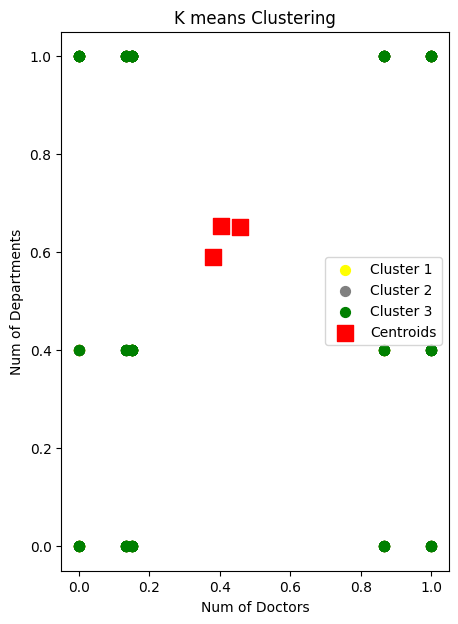

In [87]:
# Visualizing the dataset by displaying centroids for 3 clusters in 2D with centroids

# plt.scatter(X_train[:, 0], X_train[:, 1], c = output, s = 20, cmap = 'summer')
# plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c = 'blue', s = 100, alpha = 0.9);
# plt.show()

def visualize_3(x, y):
    plt.figure(figsize=(5,7))
    plt.scatter(X_scaled_min_max_df.iloc[predictions == 0, x], X_scaled_min_max_df.iloc[predictions == 0, y], color = 'yellow', label = 'Cluster 1',s=50)
    plt.scatter(X_scaled_min_max_df.iloc[predictions == 1, x], X_scaled_min_max_df.iloc[predictions == 1, y], color = 'grey', label = 'Cluster 2',s=50)
    plt.scatter(X_scaled_min_max_df.iloc[predictions == 2, x], X_scaled_min_max_df.iloc[predictions == 2, y], color = 'green', label = 'Cluster 3',s=50)

    plt.scatter(cluster_centers[:, x], cluster_centers[:, y], color = 'red', 
                    label = 'Centroids',s=120,marker=',')

    plt.grid(False)
    plt.title('K means Clustering')
    plt.xlabel('Num of Doctors')
    plt.ylabel('Num of Departments')
    plt.legend()
    plt.show()

visualize_3(0,2)

In [88]:
# getting silhouette score for k means

k_means_sil = silhouette_score(X_scaled_min_max_df, predictions)
k_means_sil, agg_sil

(0.19819704143605657, 0.19819704143605657)

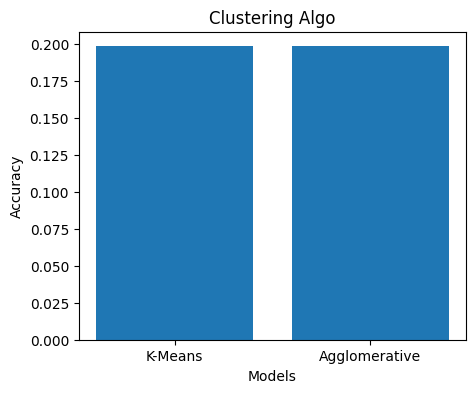

In [89]:
# comparing our cluster model with silhouette scores
silhouette_scores = [k_means_sil, agg_sil]

fig = plt.figure(figsize = (5, 4))
plt.bar(['K-Means', 'Agglomerative'], silhouette_scores)
plt.title("Clustering Algo")
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.show()

From the above analysis of clustering the data, we can summarize that, for both clustering algorithms, we have same silhouette scores. And the score is nearer to 0, which denotes that, the clusters getting overlapped. That means, we mostly have similar kind values in our data and after pointing the scatter plot, our clusters gets overlapped.

### Regression model training

<b> Correlation plot </b>

<AxesSubplot: >

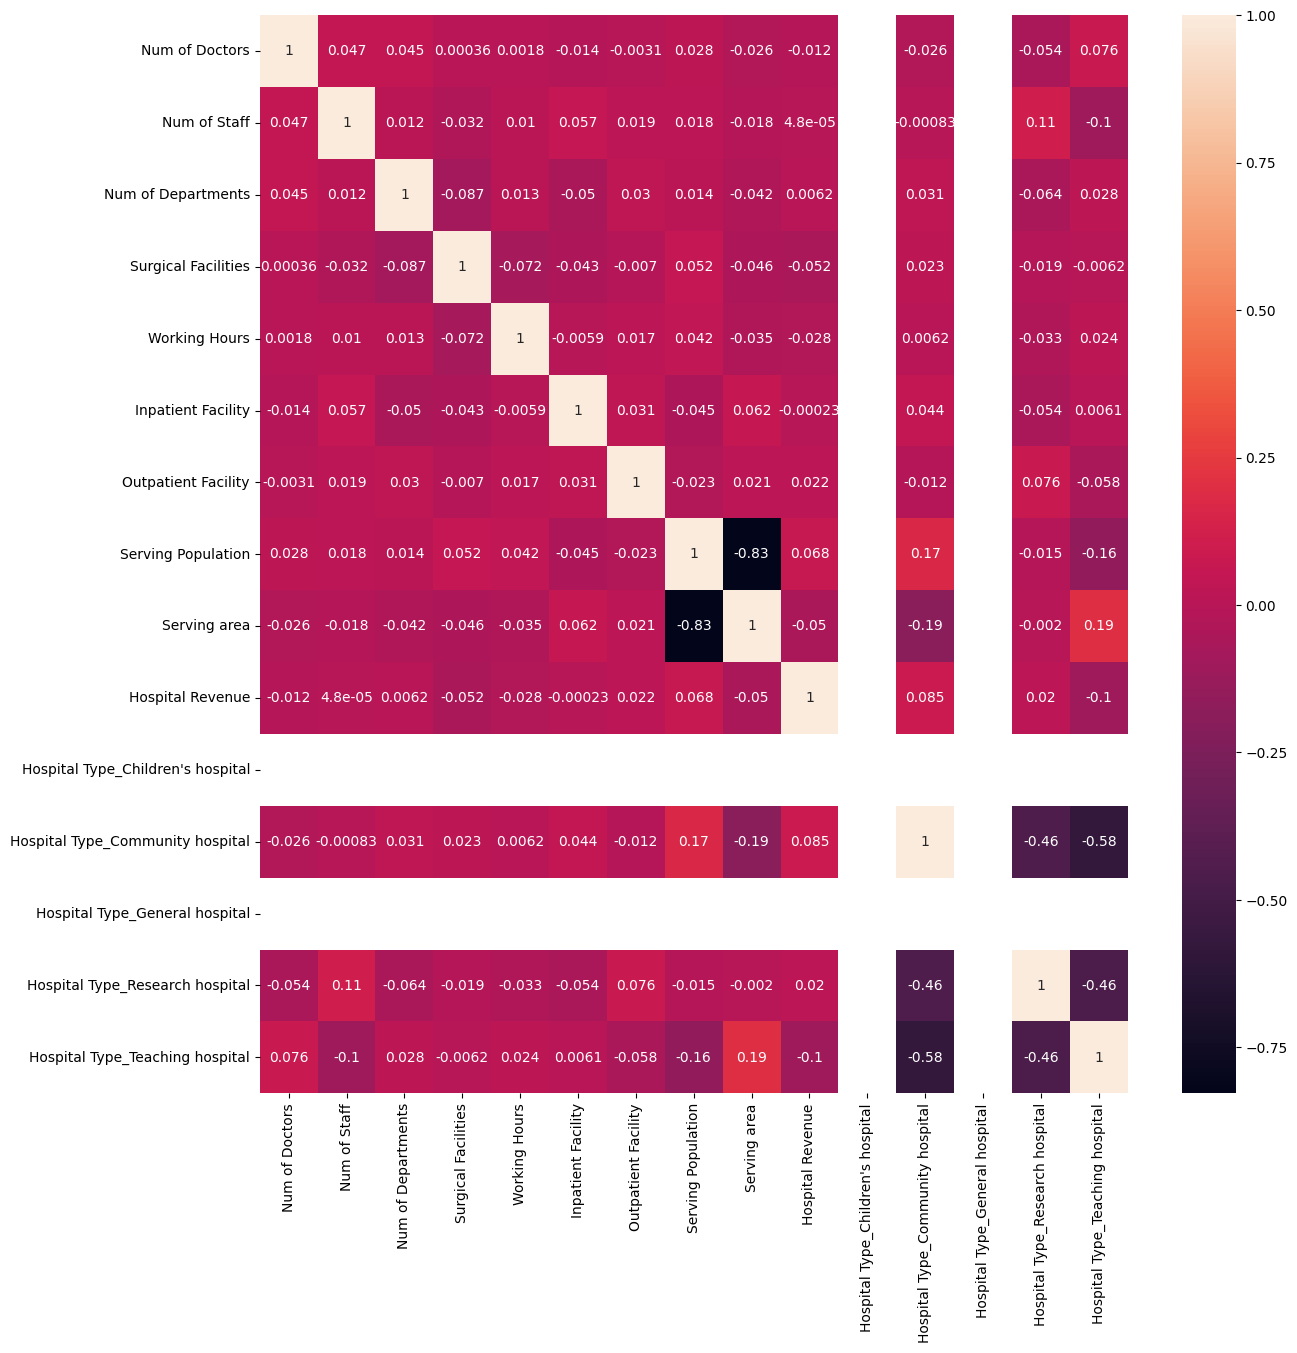

In [90]:
plt.figure(figsize=(14,14))
correlation=new_reg_train_data.corr(method='pearson')
sns.heatmap(correlation,annot=True)

As we are taking the <b>Hospital Revenue</b> as Y data, i.e dependent variable. We would like to choose the independent variable that has better correlation coeff with dependent variable.  

In this corr data, we have corr value highest for Community_Hospital(11) and Serving Population(7).

<b> Statistical learning approach : regression</b>

In [91]:
x = X_scaled_min_max_df.drop(columns=["Hospital Revenue"])
y = list(new_reg_train_data["Hospital Revenue"])
# add a constant column to take care of the intercept
import statsmodels.api as sm
X = sm.add_constant(x) 

# build the model Ordinary least squares method
model = sm.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.019
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.8871
Date:                Sun, 30 Apr 2023   Prob (F-statistic):              0.553
Time:                        15:14:12   Log-Likelihood:                -7843.3
No. Observations:                 514   AIC:                         1.571e+04
Df Residuals:                     502   BIC:                         1.576e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                              1.951e+06   1.83e+05     10.665      0.000    1.59e+06    2.31e+06
Num of Doctors                    -1.667e+04   1.13e+05     -0.148      0.882   -2.38e+05    2.04e+05
Num of Staff                       -2.92e+04   1.31e+05     -0.222      0.824   -2.87e+05    2.29e+05
Num of Departments                 6654.3925   1.09e+05      0.061      0.951   -2.08e+05    2.21e+05
Surgical Facilities               -1.206e+05   9.27e+04     -1.301      0.194   -3.03e+05    6.16e+04
Working Hours                     -8.796e+04   1.18e+05     -0.743      0.458   -3.21e+05    1.45e+05
Inpatient Facility                -5348.2616   9.28e+04     -0.058      0.954   -1.88e+05    1.77e+05
Outpatient Facility                4.014e+04   9.23e+04      0.435      0.664   -1.41e+05    2.22e+05
Serving Population                 2.594e+05   2.31e+05      1.121      0.263   -1.95e+05    7.14e+05
Serving area                        8.55e+04   1.67e+05      0.511      0.610   -2.43e+05    4.14e+05
Hospital Type_Children's hospital -3.716e-12   8.07e-12     -0.460      0.646   -1.96e-11    1.21e-11
Hospital Type_Community hospital   7.548e+05   8.81e+04      8.565      0.000    5.82e+05    9.28e+05
Hospital Type_General hospital             0          0        nan        nan           0           0
Hospital Type_Research hospital    6.782e+05   9.22e+04      7.353      0.000    4.97e+05    8.59e+05
Hospital Type_Teaching hospital    5.177e+05   9.12e+04      5.676      0.000    3.39e+05    6.97e+05
==============================================================================
Omnibus:                     3725.689   Durbin-Watson:                   2.013
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               52.163
Skew:                           0.090   Prob(JB):                     4.71e-12
Kurtosis:                       1.450   Cond. No.                     1.70e+29
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 6.71e-56. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [92]:
# r2 score of above statistical learning regression model
stats_learn_reg_score = 0.019
stats_learn_reg_score

0.019

<b> Simple linear regression</b>

In [93]:
import scipy.stats as st

x = X_scaled_min_max_df["Serving Population"].values
y = new_reg_train_data["Hospital Revenue"].values

#Intializing simple linear regression with statistical learning
model = st.linregress(x,y)
model

LinregressResult(slope=198002.3651926779, intercept=2578617.1964360275, rvalue=0.067602720842091, pvalue=0.12584857363097443, stderr=129144.69077404293, intercept_stderr=74561.72198280468)

In [94]:
x.shape, y.shape

((514,), (514,))

In [95]:
# solving linear regresssion equation with slope and intercept
y_predict = model.slope * x + model.intercept

#Calculating the regression error 𝜖
error = y - y_predict

In [96]:
y_mean = y.mean()

sst = ((y - y_mean)**2).sum()
ssr = ((y - y_predict)**2).sum()

# accuracy score for statistical learning simple linear regression 
stat_sl_score = 1 - (ssr/sst)
stat_sl_score

0.004570127865253681

Checking linearity assumption

In [97]:
error.mean()

2.3917233433704893e-10

Checking simple linear regression assumptions has a mean of zero has constant variance is normal

Text(0, 0.5, 'residuals')

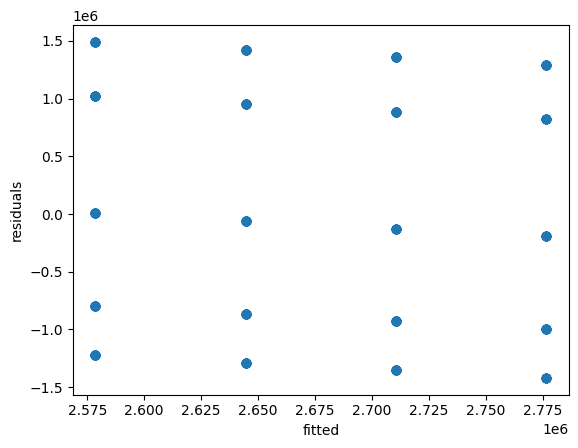

In [98]:
# has constant variance

%matplotlib inline
plt.scatter(y_predict, error)
plt.xlabel('fitted')
plt.ylabel('residuals')

### Assessing the normality assumption

To assess the normality assumption, we use a QQ-plot or a quantile-quantile plot. The quantile-quantile (QQ) plot is a graphical technique for determining if two data sets come from populations with a common distribution.

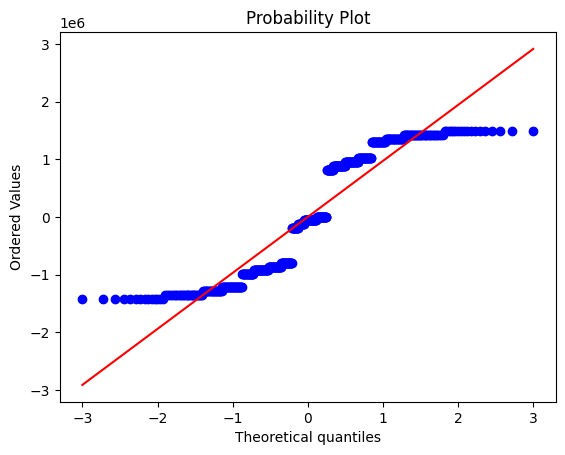

In [99]:
# is normal
%matplotlib inline
st.probplot(error, dist = 'norm', plot = plt)
plt.show()

Here the plotted points seems to have a non linear pattern

In [100]:
# Transforming y as y^1/2
y_modified = np.sqrt(y)

model = st.linregress(x,y_modified)

ym_predict = model.slope * x + model.intercept
#Calculating the regression error 𝜖
error = y_modified - ym_predict

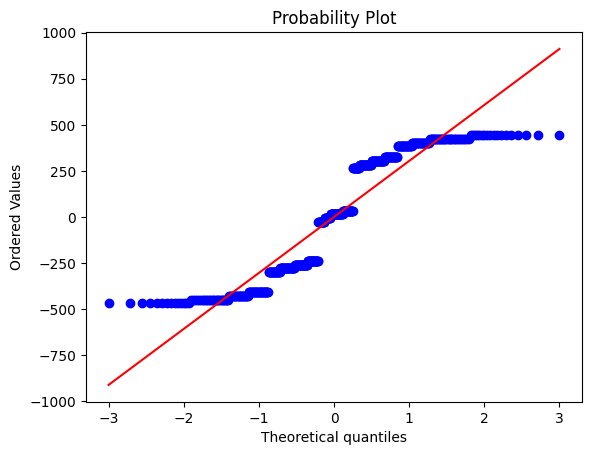

In [101]:
# is normal
%matplotlib inline
st.probplot(error, dist = 'norm', plot = plt)
plt.show()

all plotted points does not lie reasonably close to the diagonal line on the plot then conclude that the "normality" assumption does not holds on y_modified also.

In [102]:
y_mean = y_modified.mean()

sst = ((y_modified - y_mean)**2).sum()
ssr = ((y_modified - ym_predict)**2).sum()

# accuracy score for statistical learning simple linear regression 
stat_sl_score = 1 - (ssr/sst)
stat_sl_score

0.004317399455096904

Correlation

In [103]:
np.corrcoef(x, y_modified)

array([[1.        , 0.06570692],
       [0.06570692, 1.        ]])

t - test for the population correlation coefficient

The output of st.pearson r are the correlation coefficient and the two-tailed p-value obtained.

In [104]:
val = st.pearsonr(x, y_modified)

print('Correlation coefficient: ', val[0])
print('p-value (two-tailed): %.5f'%val[1])

Correlation coefficient:  0.06570692090713816
p-value (two-tailed): 0.13684


Since the p - value is greater than the significance level 𝛼 =0.05 sufficient evidence does not exists that a positive linear relationship exists between x and y_modified.

<b> Multiple Regression </b>

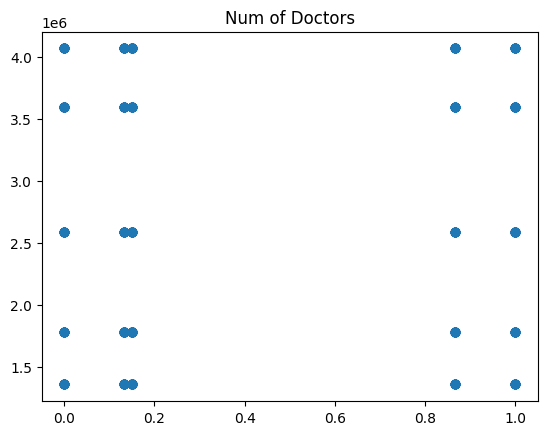

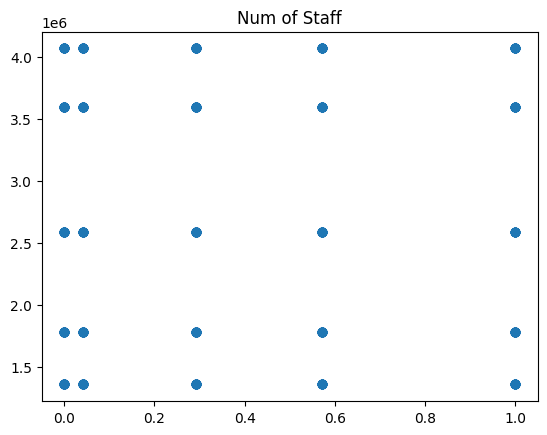

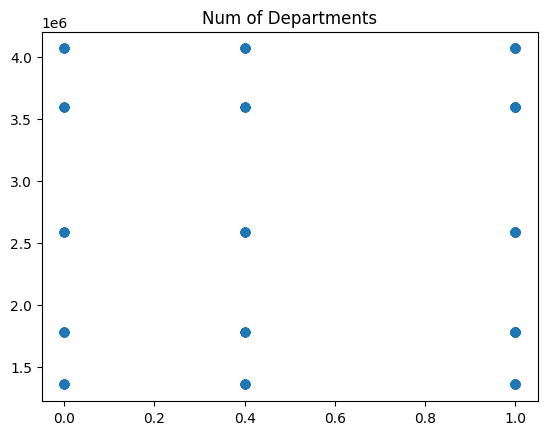

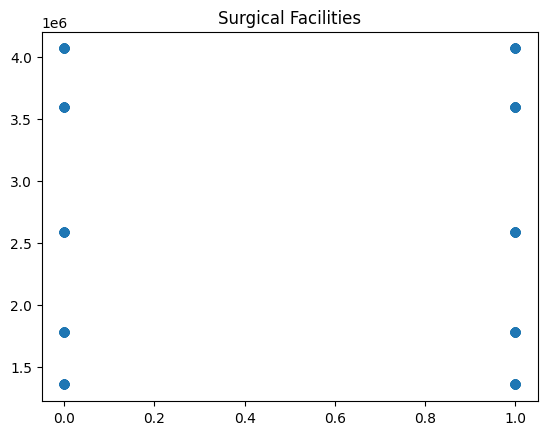

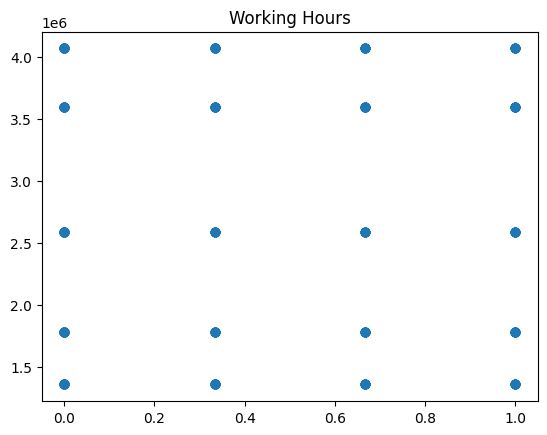

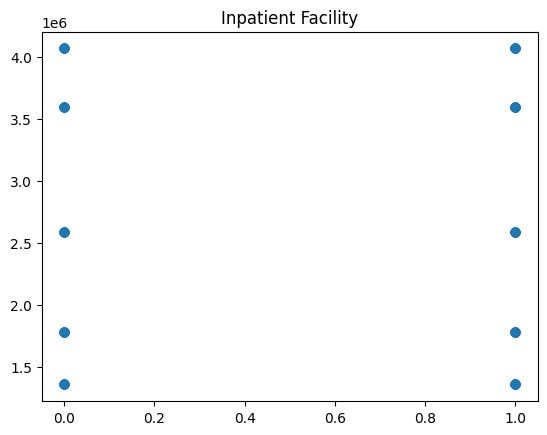

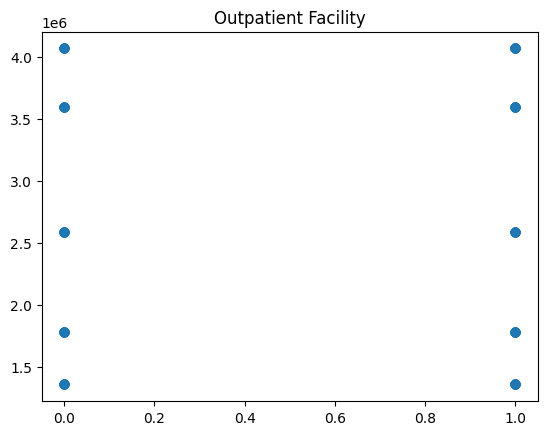

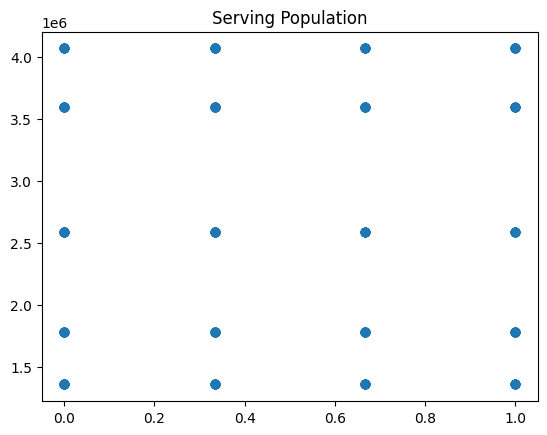

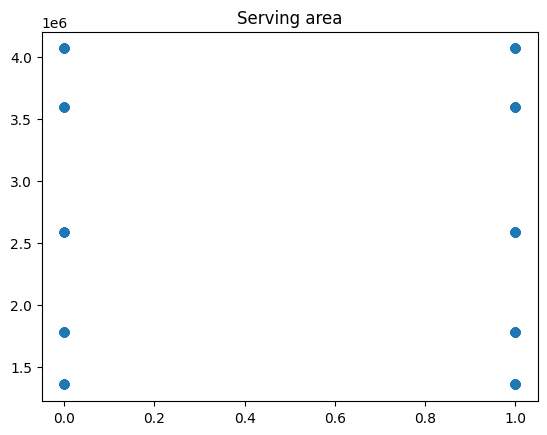

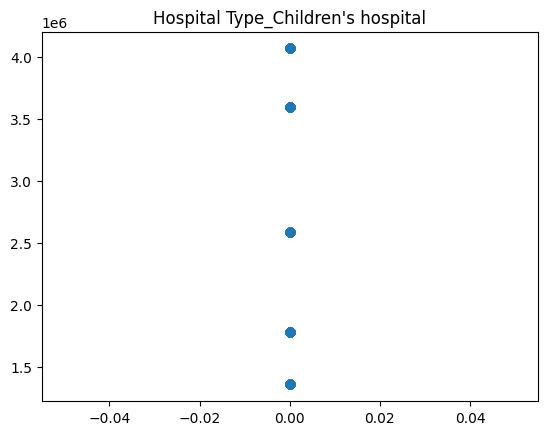

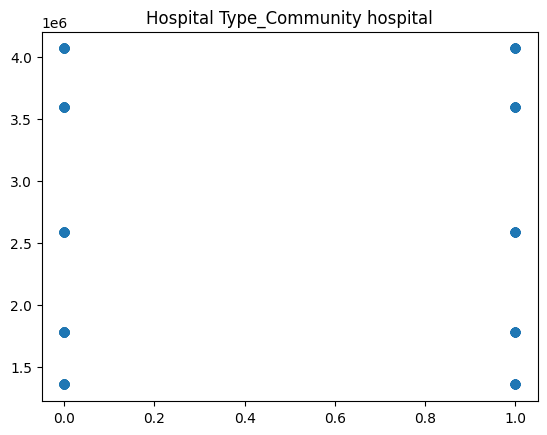

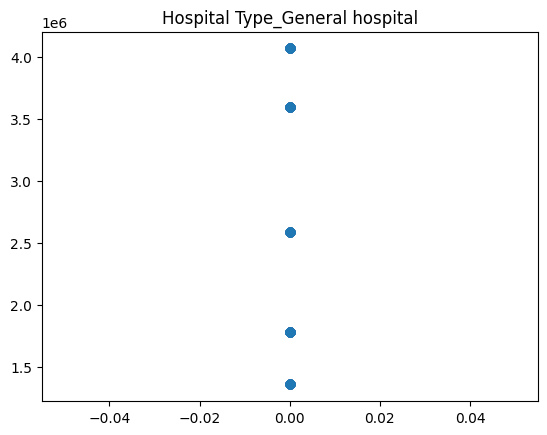

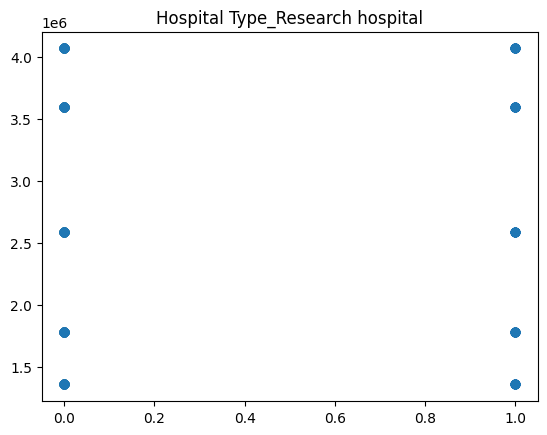

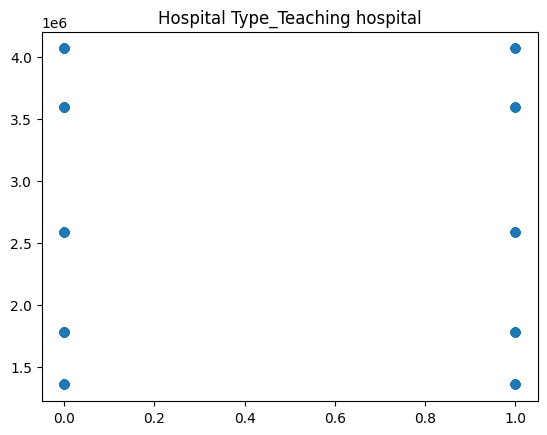

In [105]:
x = X_scaled_min_max_df.drop(columns=["Hospital Revenue"])
y = new_reg_train_data["Hospital Revenue"]

#Scatter plots for all feature columns 

%matplotlib inline

for col in x.columns:
    #print(f"======> {col} <==========")
    plt.scatter(x[col], y)
    plt.title(col)
    plt.show()

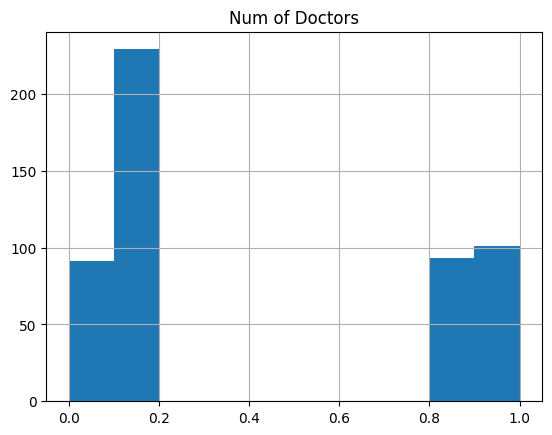

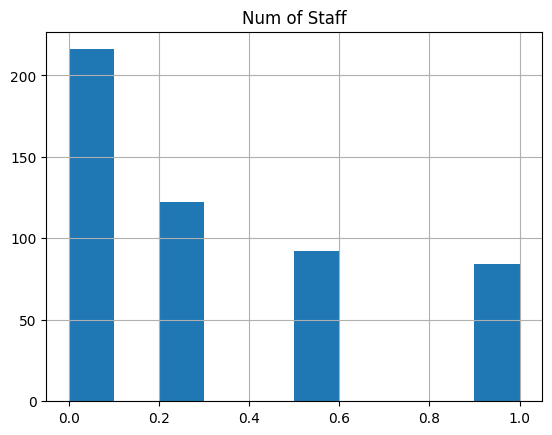

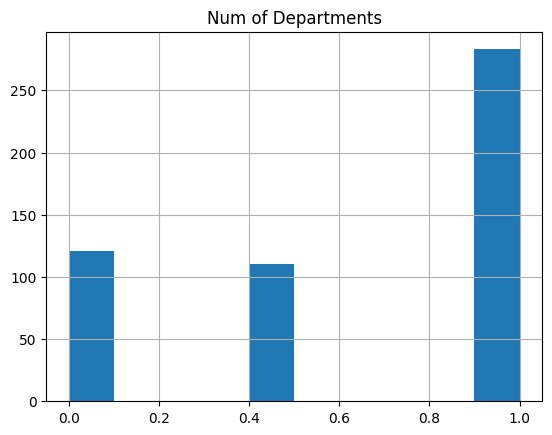

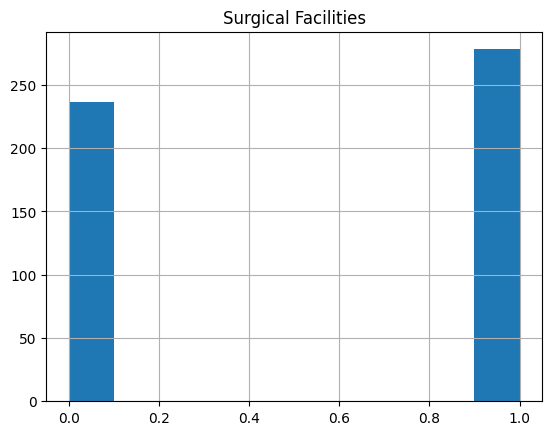

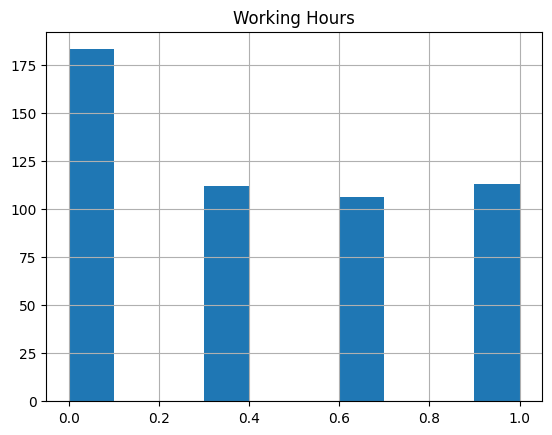

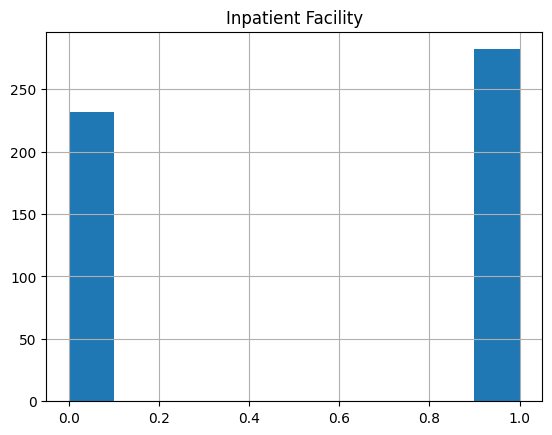

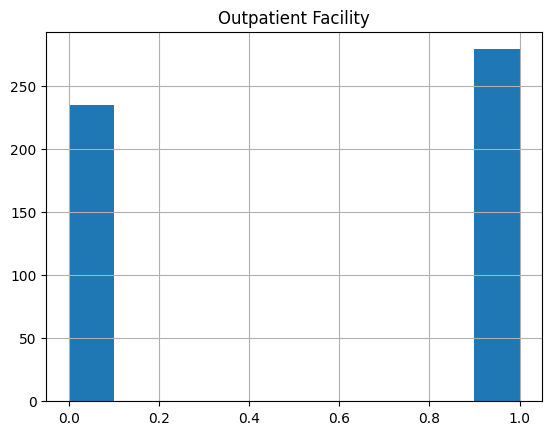

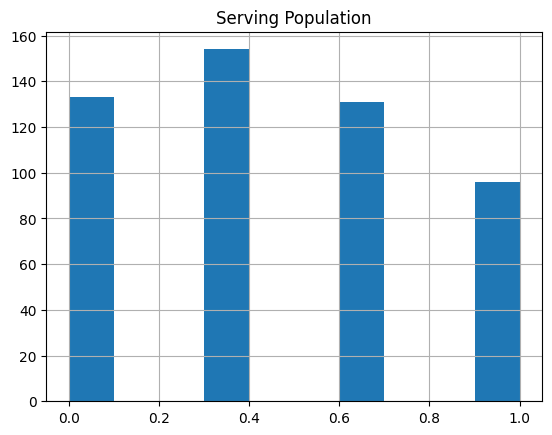

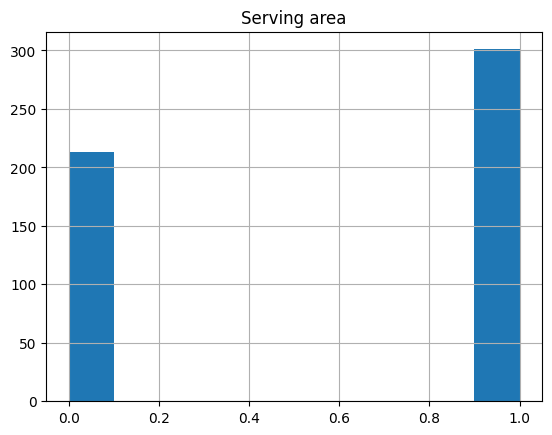

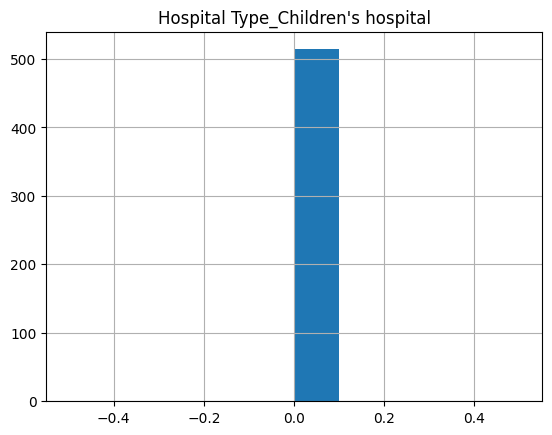

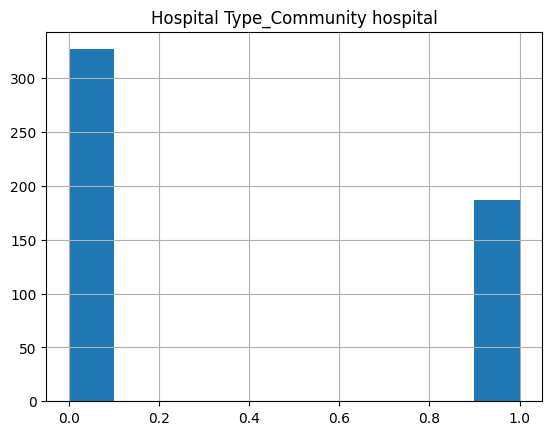

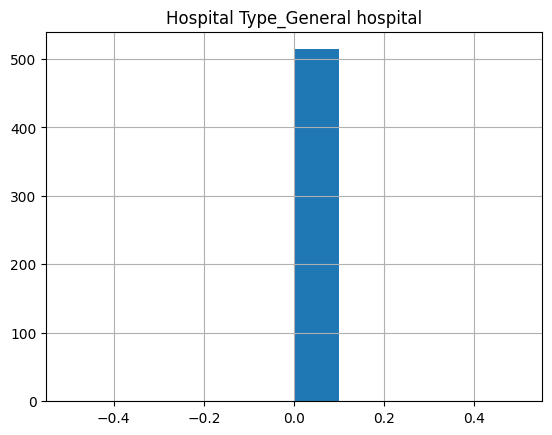

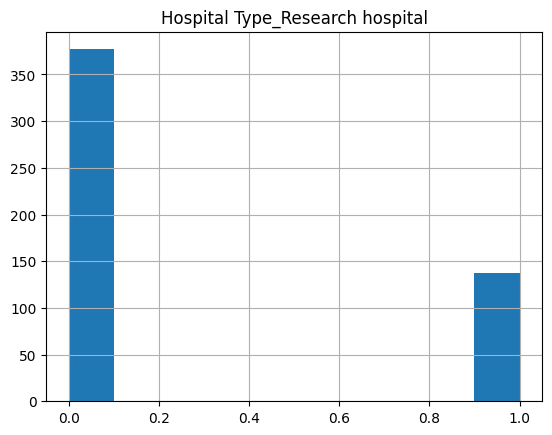

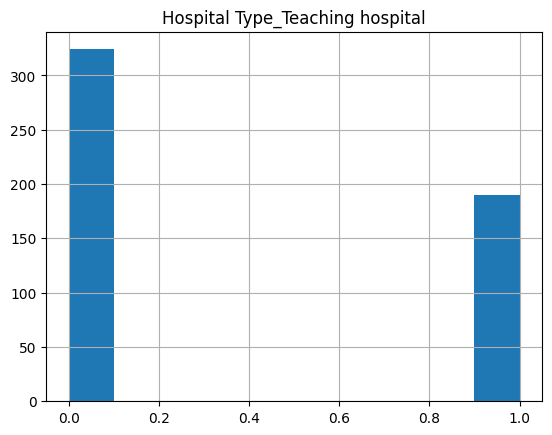

In [106]:
%matplotlib inline
# Histograms for all feature columns 
for col in x.columns:
    hist = x[col].hist(bins = 10)
    plt.title(col)
    plt.show()

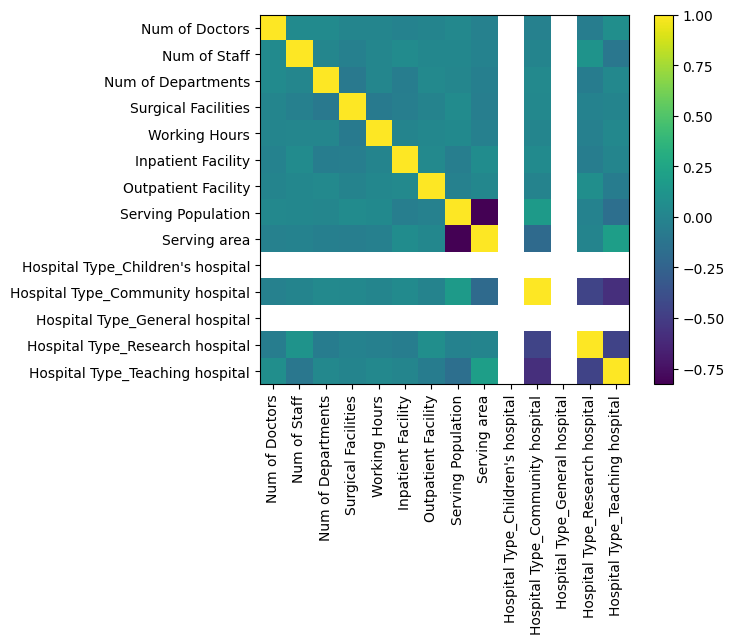

In [107]:
%matplotlib inline

# plotting the correlation plot for all the features
plt.imshow(np.corrcoef(x.T))
plt.xticks(np.arange(14), x.columns, rotation = 90)
plt.yticks(np.arange(14), x.columns)
plt.colorbar()
plt.show()

## <b> Regression - Machine learning approach  </b>

In [108]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# splitting data and processing our scores

X, Y = X_scaled_min_max_df.drop(columns=["Hospital Revenue"]), new_reg_train_data["Hospital Revenue"]

# Performing Linear regresion
lreg = LinearRegression()
lreg.fit(X, Y)

multi_reg_score = lreg.score(X, Y)
print('train r2-score: ', multi_reg_score)

train r2-score:  0.019068539630080816


Based on linear regression metrics

In [109]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
ypred = lreg.predict(X)
mse = mean_squared_error(Y,ypred)
#Metrics
print("Mean Square Error: " , mse)
print("Root Mean Square Error: ", mse**(1/2.0))
print('Mean Absolute Error is:', mean_absolute_error(Y,ypred))

Mean Square Error:  1050988163136.2344
Root Mean Square Error:  1025177.1374432003
Mean Absolute Error is: 925541.6760790789


<b> simple linear regression </b>

In [110]:
# as serving population has highest corr with dependent variable. choosing it

x, y = X_scaled_min_max_df["Serving Population"], new_reg_train_data["Hospital Revenue"]

# X_train, X_valid, y_train, y_valid = train_test_split(x,y, test_size = 0.2, random_state = 0)

lreg = LinearRegression()
lreg.fit(x.values.reshape(-1,1), y.values.reshape(-1,1))

print(lreg.intercept_)
print(lreg.coef_)
simpl_reg_score = lreg.score(x.values.reshape(-1,1), y.values.reshape(-1,1))
print('train r2-score: ', simpl_reg_score)

[2578617.19643603]
[[198002.36519268]]
train r2-score:  0.004570127865253681


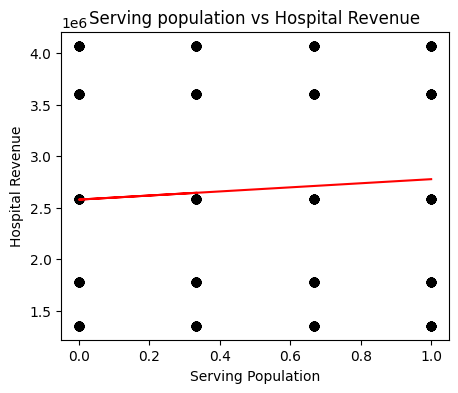

In [111]:
Yprediction = lreg.predict(x.values.reshape(-1,1))

#Visualise the train data and predicted data
import matplotlib.pyplot as plt
from PIL.Image import core as _imaging
%matplotlib inline
#to draw scatterplot 
fig, ax = plt.subplots(figsize=(5,4))
plt.scatter(x.values.reshape(-1,1), y.values.reshape(-1,1),color='black')
plt.plot(x.values.reshape(-1,1), Yprediction, color = 'red')
plt.title("Serving population vs Hospital Revenue")
plt.xlabel("Serving Population")
plt.ylabel("Hospital Revenue")
plt.show()
plt.close()

In [112]:
from sklearn import metrics
# getting the metrics for our above simple linear regression model
print('Mean Absolute Error is:', metrics.mean_absolute_error(y, Yprediction))
print('Mean Squared Error is:', metrics.mean_squared_error(y, Yprediction))
print('Root Mean Squared Error is:', np.sqrt(metrics.mean_squared_error(y, Yprediction)))
print('r2_score :', r2_score(y, Yprediction))

Mean Absolute Error is: 927980.3957631817
Mean Squared Error is: 1066522030449.8203
Root Mean Squared Error is: 1032725.5349074217
r2_score : 0.004570127865253681


### <b> SGD Regressor </b>

In [113]:
from sklearn.linear_model import SGDRegressor

X, Y = X_scaled_min_max_df.drop(columns=["Hospital Revenue"]), new_reg_train_data["Hospital Revenue"]

train_score = []
validation_score = []
index = []

# tuning the parameters to find the best params to get params which gives best train accuracy.
for max_iter in [100000, 1000000, 10000000]:
    for eta0 in [0.01, 0.001, 0.0001, 0.0001, 0.00001]:
        sgd = SGDRegressor(random_state = 0, max_iter = max_iter, learning_rate = 'constant', eta0 = eta0)
        sgd.fit(X, Y)
        train_score.append(sgd.score(X, Y))
        index.append((max_iter, eta0))

In [114]:
# getting highest train score value and index of it.
train_score[np.argsort(train_score)[-1]], index[np.argsort(train_score)[-1]]

(0.018199209360508672, (10000000, 1e-05))

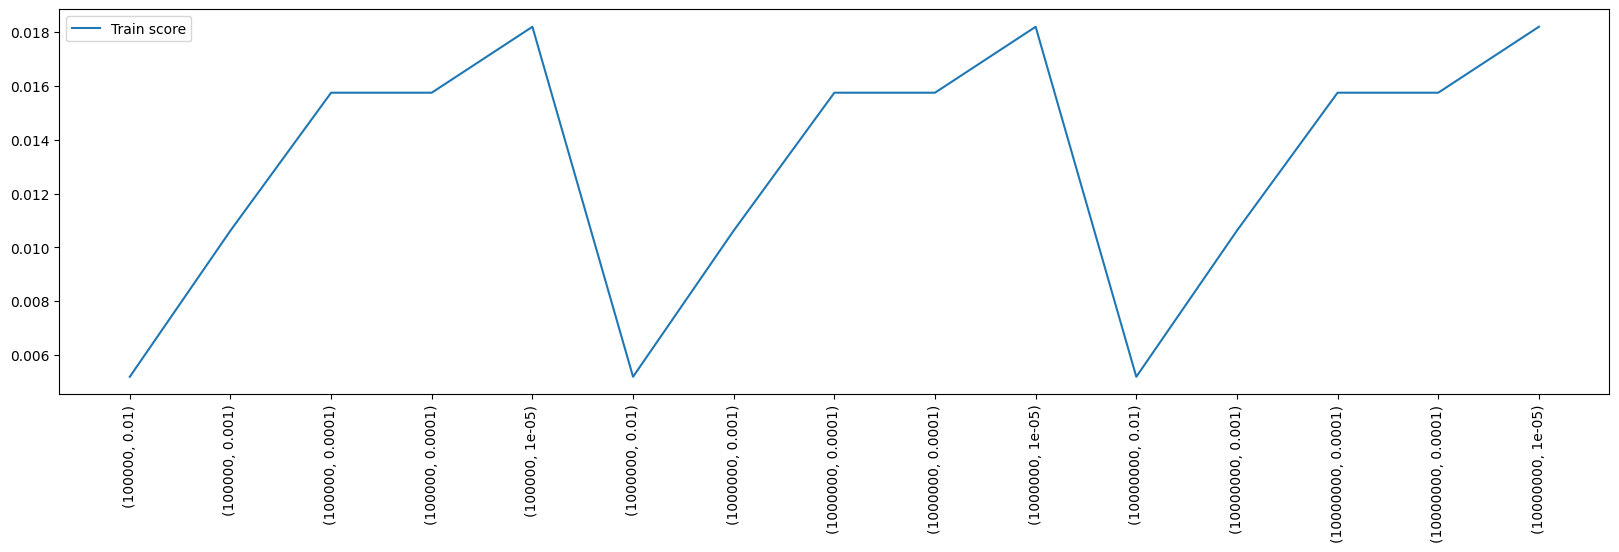

In [115]:
%matplotlib inline

# plotting the train scores for diff parameter tuning
plt.subplots(figsize = (20,5))
plt.plot(range(len(index)),  train_score, label = 'Train score')
plt.xticks(range(len(index)), index, rotation = 90)
plt.legend()
plt.show()

As we got our metrics for our model based on tuning the parameters, now we will train our data.

In [116]:
sgd = SGDRegressor(random_state = 0, max_iter = 100000, learning_rate = 'constant', eta0 = 0.00001)
sgd.fit(X, Y)

ypred = sgd.predict(X)

mse = mean_squared_error(Y,ypred)

#Metrics
print("Mean Square Error: " , mse)
print("Root Mean Square Error: ", mse**(1/2.0))
print('Mean Absolute Error is:', mean_absolute_error(Y,ypred))
sgd_score = sgd.score(X, Y)
print('train r2-score: ', sgd_score)

Mean Square Error:  1051919579713.323
Root Mean Square Error:  1025631.3078847209
Mean Absolute Error is: 926267.0002545726
train r2-score:  0.018199209360508672


In [117]:
sgd.n_iter_

16444

### <b> Polynomial Regression </b>

In [118]:
X_scaled_min_max_df.shape

(514, 15)

In [119]:
from sklearn.preprocessing import PolynomialFeatures

x_poly, y_poly = X_scaled_min_max_df.drop(columns=["Hospital Revenue"]), new_reg_train_data["Hospital Revenue"]

# processing by transforming our data to polynomial data using degree as 2
poly = PolynomialFeatures(degree = 2)
poly.fit(x_poly)

X_train_poly = poly.transform(x_poly)

# Then performing the Regression analysis and analyzing the metrics
lreg = LinearRegression()
lreg.fit(X_train_poly, y_poly)

poly_score = lreg.score(X_train_poly, y_poly)
print('train r2-score: ', poly_score)

train r2-score:  0.1350442012633184


In [120]:
train_score = []
validation_score = []
index = []

# Tuning the params for polynomial regression to select the best params which gives high train score.
for max_iter in [10000, 100000, 1000000]:
    for eta0 in [0.01, 0.001, 0.0001, 0.0001]:
        sgd = SGDRegressor(random_state = 0, max_iter = max_iter, learning_rate = 'constant', eta0 = eta0)
        sgd.fit(X_train_poly, y_poly)
        train_score.append(sgd.score(X_train_poly, y_poly))
        # validation_score.append(sgd.score(X_valid_poly, y_valid))
        index.append((max_iter, eta0))

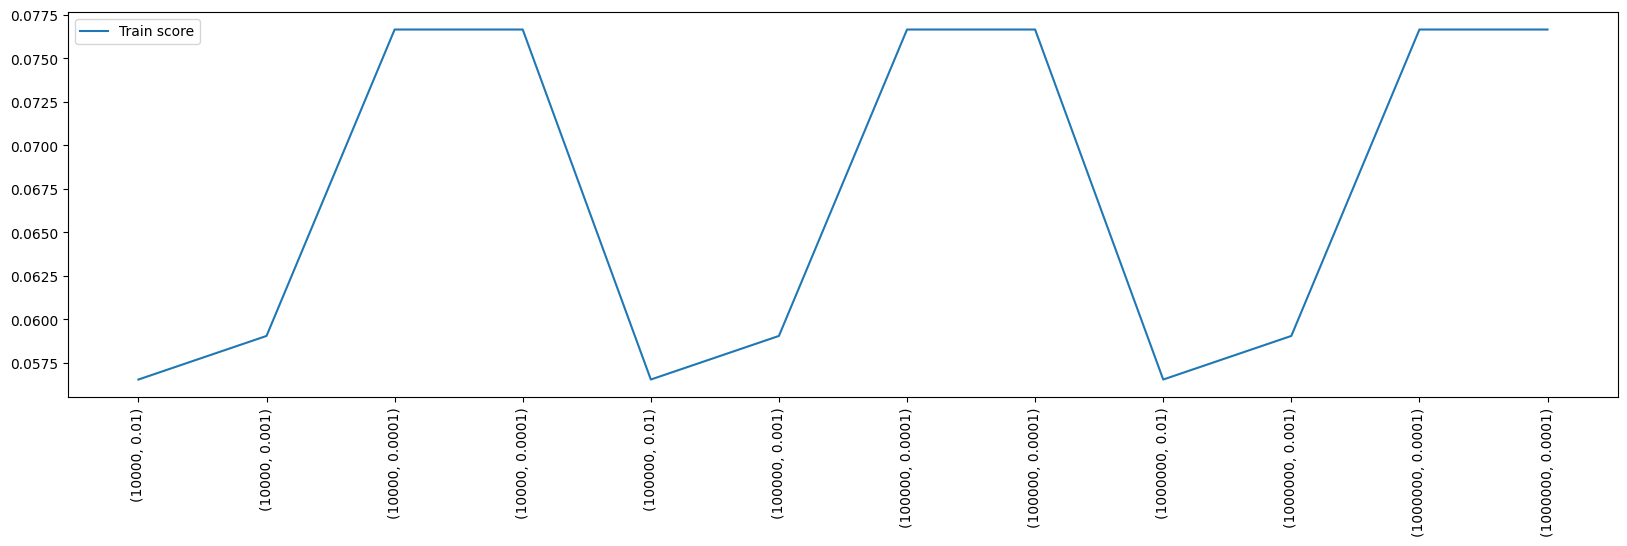

In [121]:
%matplotlib inline

# plotting the train scores for diff parameter tuning
plt.subplots(figsize = (20,5))
plt.plot(range(len(index)),  train_score, label = 'Train score')
plt.xticks(range(len(index)), index, rotation = 90)
plt.legend()
plt.show()

In [122]:
# getting highest train score value and index of it.
train_score[np.argsort(train_score)[-1]], index[np.argsort(train_score)[-1]]

(0.07664555397968464, (1000000, 0.0001))

In [123]:
sgd = SGDRegressor(random_state = 0, max_iter = 10000, learning_rate = 'constant', eta0 = 0.0001)
sgd.fit(X_train_poly, y_poly)

poly_score = sgd.score(X_train_poly, y_poly)
print('train r2-score: ', poly_score)

train r2-score:  0.07664555397968464


### <b> Decision Tree </b>

In [124]:
X_tree = new_reg_train_data.drop('Hospital Revenue', axis = 1)
y_tree = new_reg_train_data['Hospital Revenue']

Text(0, 0.5, 'Hospital Revenue')

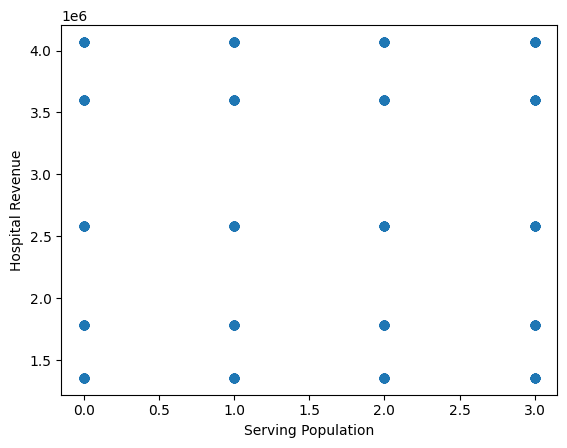

In [125]:
%matplotlib inline
# plotting scatter plot between Serving popln vs Hospital Revenue
plt.scatter(new_reg_train_data['Serving Population'], new_reg_train_data['Hospital Revenue'])
plt.xlabel('Serving Population')
plt.ylabel('Hospital Revenue')

In [126]:
from sklearn.tree import DecisionTreeRegressor

# processing Decision Tree regression
dt = DecisionTreeRegressor(random_state = 0)
dt.fit(new_reg_train_data['Serving Population'].values.reshape(-1,1), new_reg_train_data['Hospital Revenue'].values)

DecisionTreeRegressor(random_state=0)

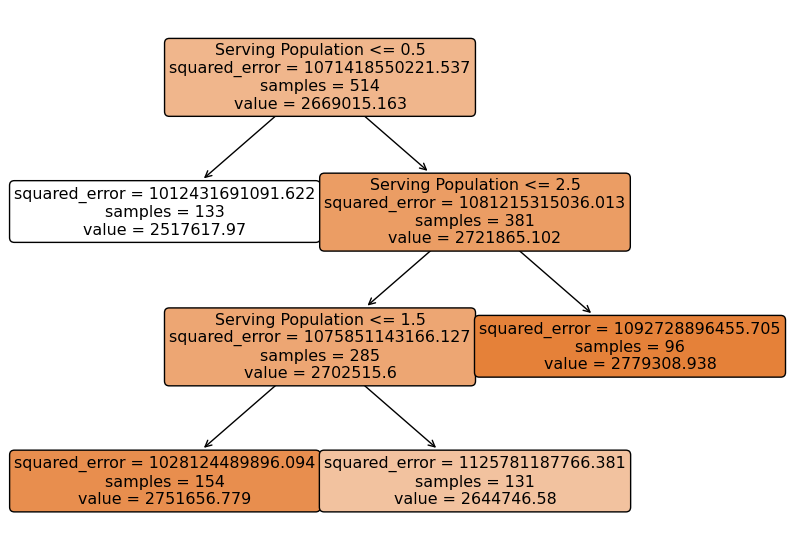

In [127]:
from sklearn import tree 

# plotting decision tree for our model data
plt.subplots(figsize = (10,7))
tree.plot_tree(dt, 
               feature_names=['Serving Population'],  
               filled=True,
               rounded = True)
plt.show()

In [128]:
new_reg_train_data['Serving Population'].value_counts()

1    154
0    133
2    131
3     96
Name: Serving Population, dtype: int64

In [129]:
vals = [0.5, 1.5, 2.5, 3.5]

# getting mean and rss (residual sum of squares) for analyzing the split of data in left split and right split
rss1 = []
rss2 = []
for val in vals:
    mean = new_reg_train_data[new_reg_train_data['Serving Population'] < val]['Hospital Revenue'].mean()
    rss = ((new_reg_train_data[new_reg_train_data['Serving Population'] < val]['Hospital Revenue'] - mean)** 2).sum()
    rss1.append(rss)
    mean = new_reg_train_data[new_reg_train_data['Serving Population'] >= val]['Hospital Revenue'].mean()
    rss = ((new_reg_train_data[new_reg_train_data['Serving Population'] >= val]['Hospital Revenue'] - mean)** 2).sum()
    rss2.append(rss)

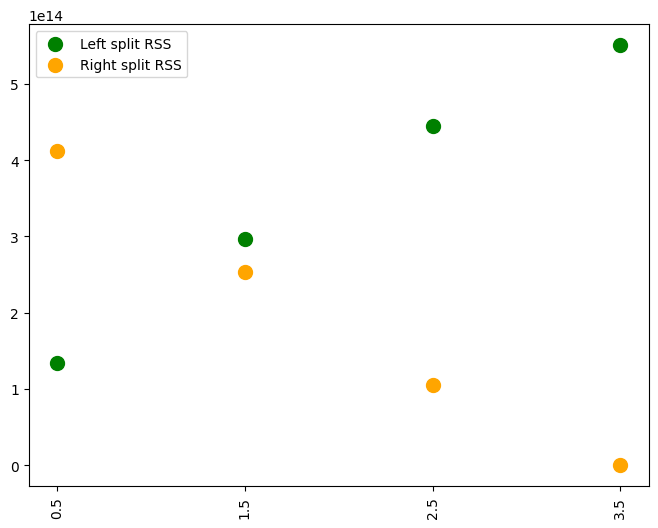

In [130]:
%matplotlib inline

# plotting the scatter plot for above rss scores, to know the left and right split
plt.subplots(figsize = (8, 6))
plt.scatter(vals, rss1, label = 'Left split RSS', s= 100, c = 'g')
plt.scatter(vals, rss2, label = 'Right split RSS', s = 100, c = 'orange')
plt.legend()
plt.xticks(vals, rotation = 90)
plt.show()

In [131]:
rss1 = np.array(rss1)
rss2 = np.array(rss2)

cost = []
index = 0
for val in vals:
    left = new_reg_train_data[new_reg_train_data['Serving Population'] < val].shape[0]/new_reg_train_data.shape[0]
    right = new_reg_train_data[new_reg_train_data['Serving Population'] >= val].shape[0]/new_reg_train_data.shape[0]
    cost.append(left*rss1[index] + right*rss2[index])
    index += 1

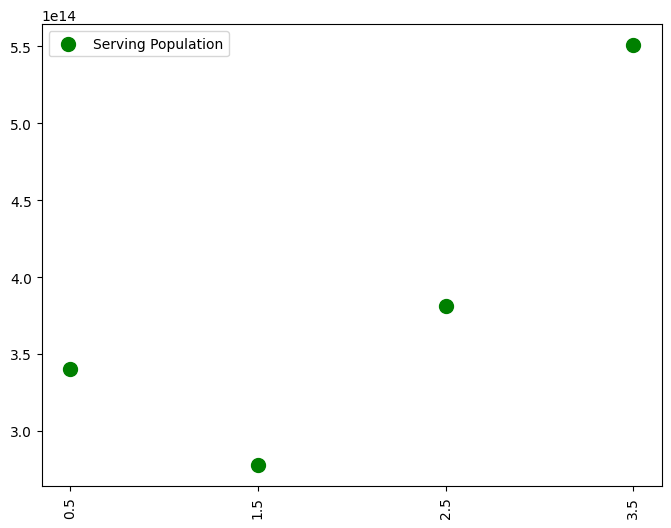

In [132]:
%matplotlib inline

plt.subplots(figsize = (8, 6))
plt.scatter(vals, cost, label = 'Serving Population', s= 100, c = 'g')
plt.legend()
plt.xticks(vals, rotation = 90)
plt.show()

In [133]:
from sklearn.tree import DecisionTreeRegressor,plot_tree

# scaling our data using standard scaling
scaler = StandardScaler()
scaler.fit(X_tree)
X_train = scaler.transform(X_tree)
dtreg = DecisionTreeRegressor(random_state= 0)
dtreg.fit(X_train, y_tree)
print('Train r2-score:', dtreg.score(X_train, y_tree))

Train r2-score: 0.9905296953957742


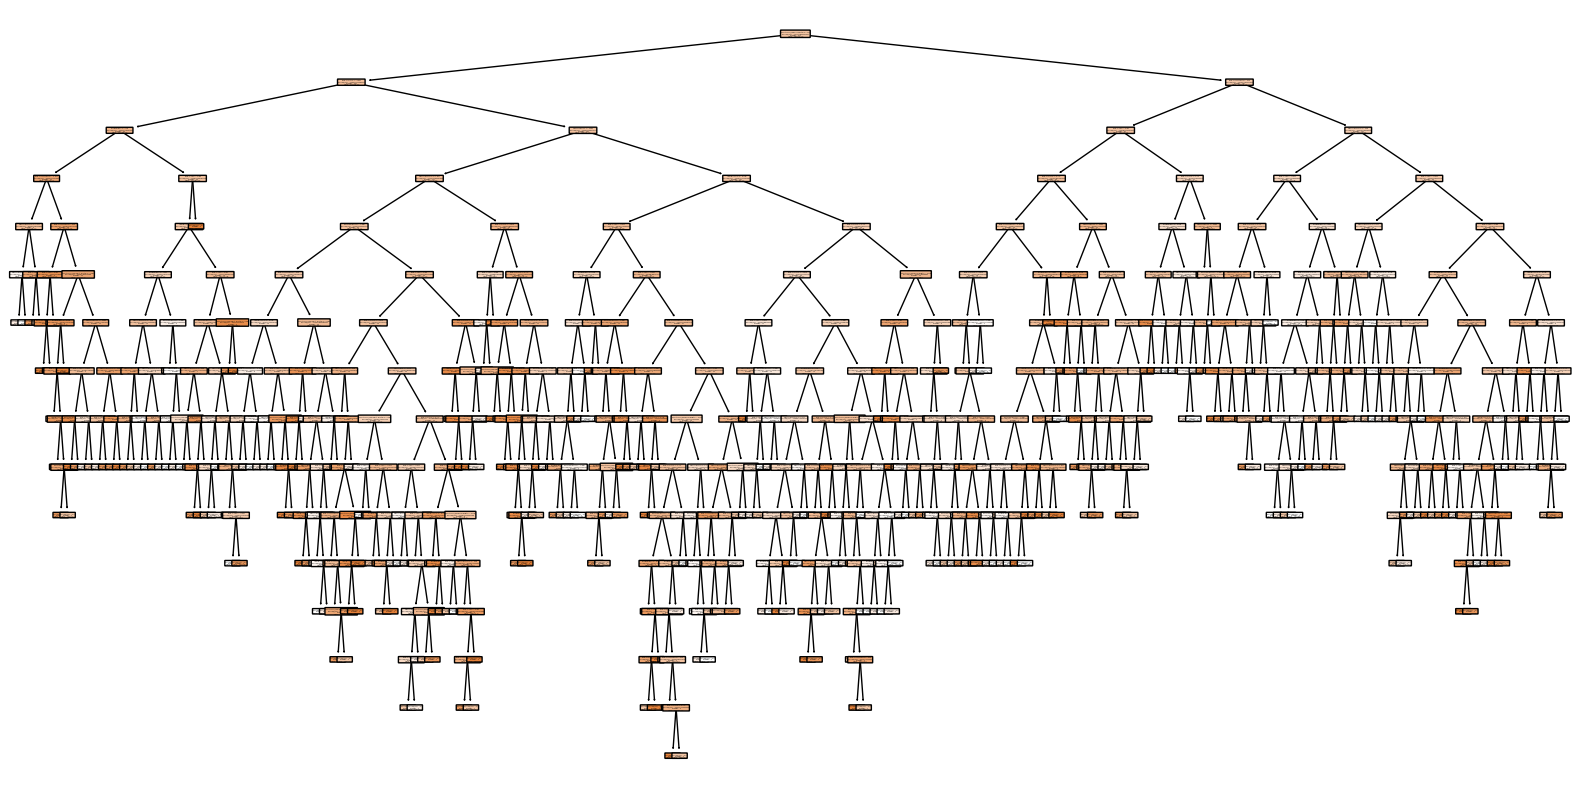

In [134]:
# plotting the decision tree, for our above model

plt.subplots(figsize = (20, 10))
plot_tree(dtreg, 
               feature_names=X_tree.columns,  
              
               filled=True,
               rounded = True)
plt.show()

Tuning the params with Early stopping

In [135]:
train_scores = []
index = []

# Tuning the params to get best params, for getting better train score.
# min_samples_split, max_depth, min_impurity_decrease
for smpl_split in list(range(20, 40)):
  for max_dpth in list(range(2,10)):
    for min_imp_dec in [0.01, 0.001, 0.0001]:
      dt = DecisionTreeRegressor(random_state = 0, min_samples_split= smpl_split, max_depth = max_dpth, min_impurity_decrease= min_imp_dec)
      dt.fit(X_train, y_tree)
      train_scores.append(dt.score(X_train, y_tree))
      index.append([smpl_split, max_dpth, min_imp_dec])

In [136]:
# getting highest train score value and index of it.
train_scores[np.argsort(train_scores)[-1]], index[np.argsort(train_scores)[-1]]

(0.2235818554330289, [20, 9, 0.0001])

In [137]:
# processing with above params for our decision tree model.
dt = DecisionTreeRegressor(random_state = 0, min_samples_split = 20, max_depth = 9, min_impurity_decrease = 0.0001)
dt.fit(X_train, y_tree)
dt_score = dt.score(X_train, y_tree)
print("Accuracy on training set: {:.3f}".format(dt_score))

Accuracy on training set: 0.224


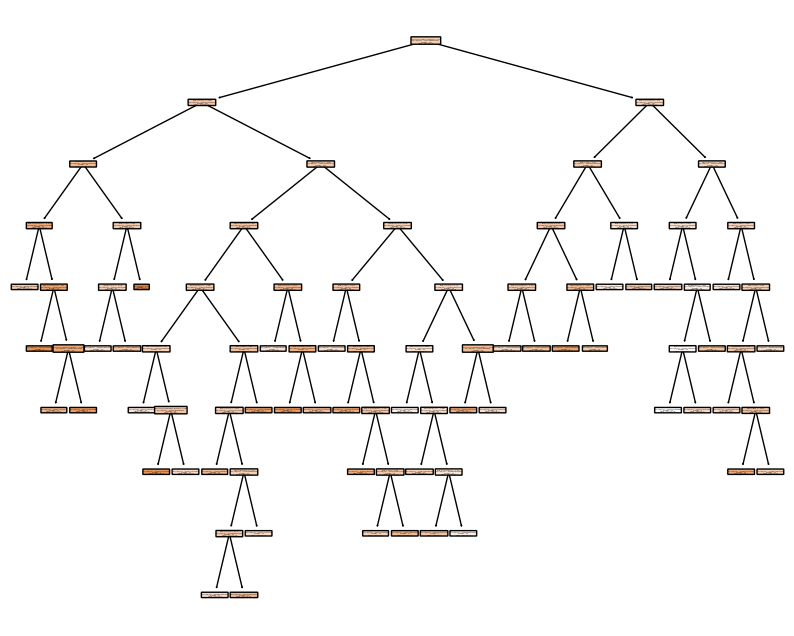

In [138]:
# plotting the decision tree for our above model and data
plt.subplots(figsize = (10,8))
tree.plot_tree(dt, 
               feature_names=X_tree.columns,  
               #class_names=iris.target_names,
               filled=True,
               rounded = True)
plt.show()

<b> Bagging Regression </b>

In [139]:
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler

X = new_reg_train_data.drop(columns=["Hospital Revenue"])
y = new_reg_train_data["Hospital Revenue"]

scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

# processing the bagging regressor with below params. 
dt_model = DecisionTreeRegressor(random_state = 0)
bag_dt_model = BaggingRegressor(dt_model, 
                                max_features=1.0, 
                                n_estimators=5, 
                                bootstrap=True, 
                                random_state=0)
bag_dt_model.fit(X_scaled, y)

BaggingRegressor(estimator=DecisionTreeRegressor(random_state=0),
                 n_estimators=5, random_state=0)

In [140]:
print('Train score: ', bag_dt_model.score(X_scaled, y))

Train score:  0.7335313941170656


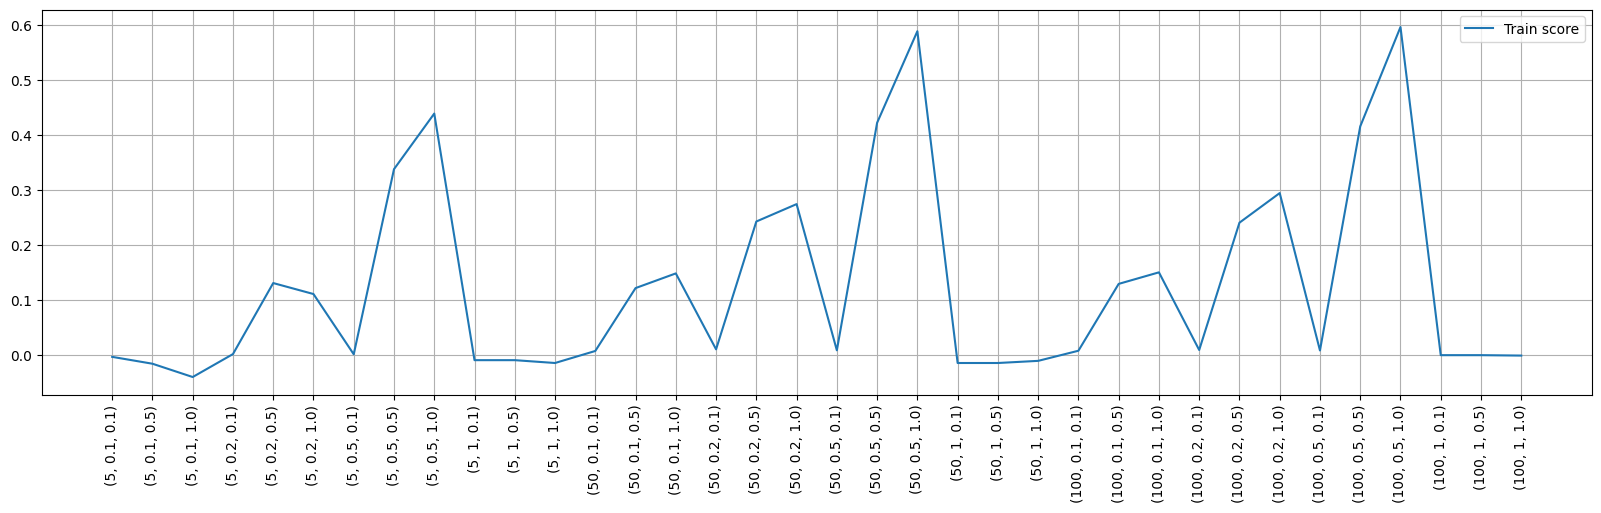

In [141]:
train_score = []
test_score = []
index = []

# Tuning the params with bagging regressor and decision tree model for better train score
for n_estimators in [5, 50, 100]:    
    for max_samples in [0.1, 0.2, 0.5, 1]:
        for max_features in [0.1, 0.5, 1.0]:
            dt_model = DecisionTreeRegressor(random_state = 0)
            bag_dt_model = BaggingRegressor(dt_model, 
                                max_features = max_features, 
                                n_estimators = n_estimators, 
                                max_samples = max_samples,
                                bootstrap = True, 
                                random_state=0)
            bag_dt_model.fit(X_scaled, y)
            train_score.append(bag_dt_model.score(X_scaled, y))
            index.append((n_estimators,
                          max_samples, max_features))

%matplotlib inline

# plotting the train score for above tuning params
plt.subplots(figsize = (20,5))
plt.plot(range(len(index)), train_score, label = 'Train score')
plt.xticks(range(len(index)), index, rotation = 90)
plt.legend()
plt.grid()

In [142]:
# getting highest train score value and index of it.
train_score[np.argsort(train_score)[-1]], index[np.argsort(train_score)[-1]]

(0.5961272677771533, (100, 0.5, 1.0))

In [143]:
# processing and performing or training our model with above tuning params
dt_model = DecisionTreeRegressor(random_state = 0)
bag_dt_model = BaggingRegressor(dt_model, 
                                max_samples=0.5,
                                max_features=1.0, 
                                n_estimators=100, 
                                bootstrap=True, 
                                random_state=0)
bag_dt_model.fit(X_scaled, y)
bagg_reg_score = bag_dt_model.score(X_scaled, y)
print('Train score: ', bagg_reg_score)

Train score:  0.5961272677771533


<b> Random Forest Regression </b>

In [144]:
from sklearn.ensemble import RandomForestRegressor

# processing random forest with max depth 1 
rfr = RandomForestRegressor(max_depth = 1, random_state=0)
rfr.fit(X_scaled, y)

print('Train score: ', rfr.score(X_scaled, y))

Train score:  0.016840646432424666


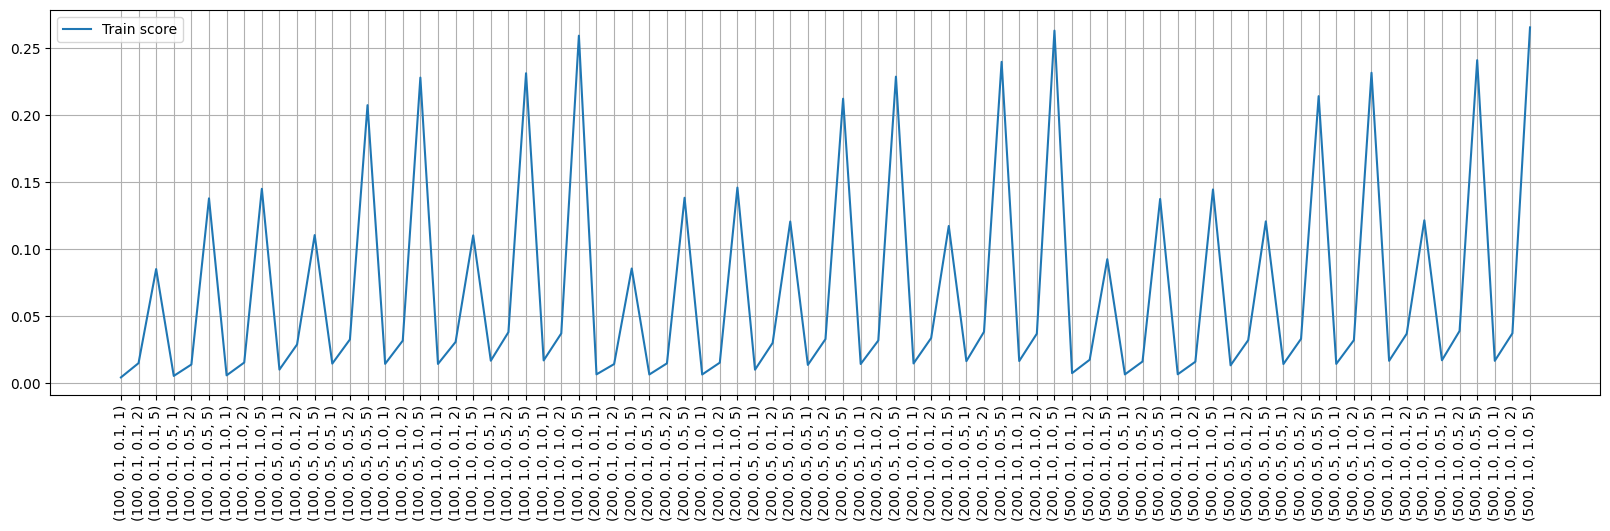

In [145]:
train = []
test = []
index = []

# Tuning the params for our model for get better accuracy
for n_estimators in [100, 200, 500]:
    for max_features in [0.1, 0.5, 1.0]:
        for max_samples in [0.1, 0.5, 1.0]:
            for max_depth in [1, 2, 5]:
                rfr = RandomForestRegressor(random_state= 0, 
                                             n_estimators = n_estimators,
                                             max_samples= max_samples, 
                                             max_features= max_features, 
                                             max_depth= max_depth)
                rfr.fit(X_scaled, y)
                train.append(rfr.score(X_scaled, y))
                index.append((n_estimators, max_features, 
                              max_samples, max_depth))
                
%matplotlib inline

# plotting the train scores for various tuning params
plt.subplots(figsize = (20,5))
plt.plot(range(len(index)), train, label = 'Train score')
plt.xticks(range(len(index)), index, rotation = 90)
plt.legend()
plt.grid()

In [146]:
# getting highest train score value and index of it.
train[np.argsort(train)[-1]], index[np.argsort(train)[-1]]

(0.2653155607514117, (500, 1.0, 1.0, 5))

In [147]:
# Training our random forest regressor model with above tuning params
rfr = RandomForestRegressor(random_state= 0, n_estimators = 500, max_samples= 1.0, 
                            max_features= 1.0, max_depth= 5)
rfr.fit(X_scaled, y)

rf_score = rfr.score(X_scaled, y)
print('Train score: ', rf_score)

Train score:  0.2653155607514117


<b> Evaluation of different models </b>

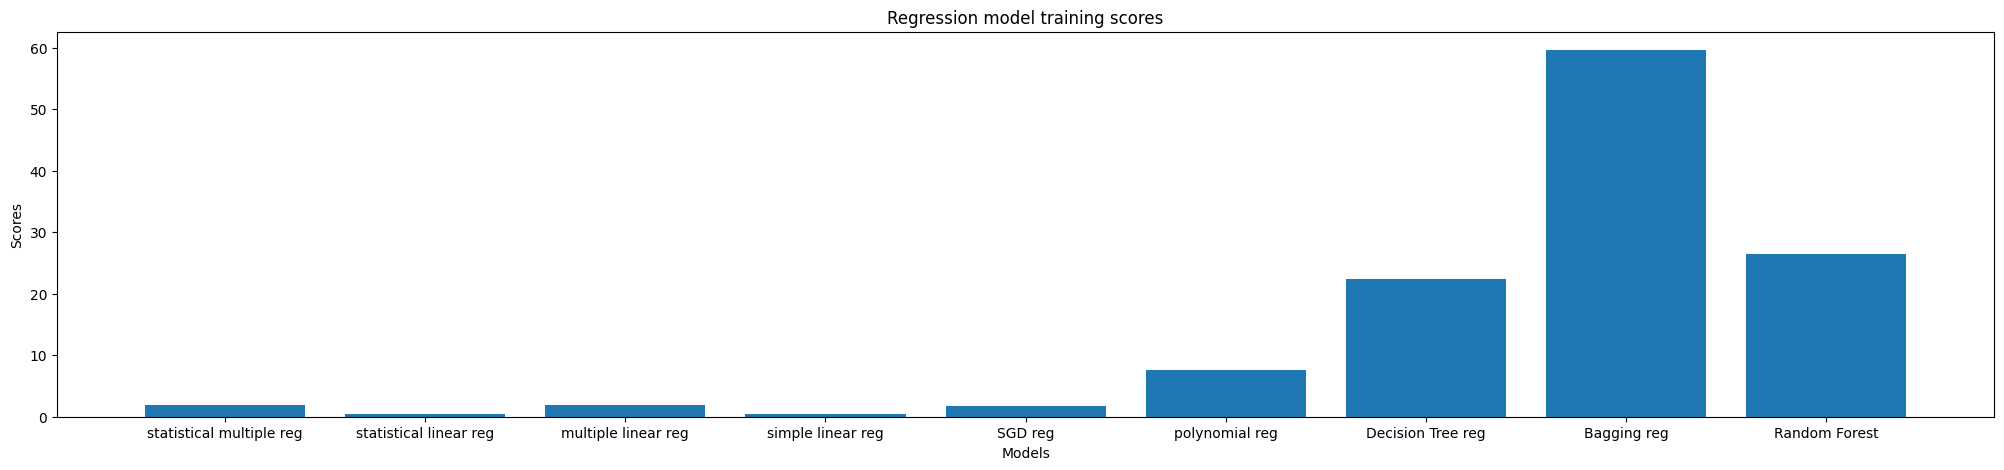

In [148]:
model_scores = [stats_learn_reg_score*100, stat_sl_score*100, multi_reg_score*100, simpl_reg_score*100, 
                sgd_score*100, poly_score*100, dt_score*100, bagg_reg_score*100, rf_score*100]

model_names = ["statistical multiple reg", "statistical linear reg", "multiple linear reg", "simple linear reg",
               "SGD reg", "polynomial reg", "Decision Tree reg", "Bagging reg", "Random Forest"]

# plotting the train scores for all our above models, that we have trained.
fig = plt.figure(figsize = (25, 5))
plt.bar(model_names, model_scores)
plt.xlabel("Models")
plt.ylabel("Scores")
plt.title("Regression model training scores")
plt.show()

In [149]:
model_scores

[1.9,
 0.4317399455096904,
 1.9068539630080816,
 0.45701278652536814,
 1.8199209360508672,
 7.664555397968464,
 22.358185543302888,
 59.61272677771533,
 26.53155607514117]

Based on above comparative algorithms analysis, we can conclude that, Bagging regressor with decision tree has better performance, hence we select the model.

### Regression prediction

In [150]:
# bag_dt_model
X_test = X_scaled_min_max_df_test

# prediciting the test data for the model that we have selected, which is Bagging Regressor with Decision Tree model
# We are predicting the Housing Revenue with the test data we have
yt_pred = bag_dt_model.predict(X_test)
new_reg_test_data["Hospital Revenue"] = yt_pred

# predicting for the trained data
ytr_pred = bag_dt_model.predict(X_scaled)
# rfy_pred = rfr.predict(X_test)

# Bagging Decision tree regressor for trained data
print('accuracy score:', bag_dt_model.score(X_scaled, y)*100) 

accuracy score: 59.61272677771533


In [151]:
new_reg_test_data.head()

,Num of Doctors,Num of Staff,Num of Departments,Surgical Facilities,Working Hours,Inpatient Facility,Outpatient Facility,Serving Population,Serving area,Hospital Type_Children's hospital,Hospital Type_Community hospital,Hospital Type_General hospital,Hospital Type_Research hospital,Hospital Type_Teaching hospital,Hospital Revenue
0,133.0,290.0,12.0,1,0,0,1,2,1,0,1,0,0,0,2234595.33
1,141.0,212.0,10.0,1,1,0,1,2,1,0,1,0,0,0,2716472.79
3,90.0,249.0,15.0,0,2,0,1,1,0,0,0,0,0,1,2415742.90
4,89.0,290.0,15.0,0,0,0,1,1,0,0,0,0,0,1,2388085.93
6,90.0,249.0,15.0,0,0,0,1,1,0,0,0,0,0,1,2375352.76


In [152]:
yt_pred # Hospital revenue prediction

array([2234595.33 , 2716472.79 , 2415742.9  , 2388085.93 , 2375352.76 ,
       2287153.51 , 2477503.91 , 2143760.39 , 2558921.59 , 2495152.77 ,
       2304195.38 , 2417255.13 , 2426676.55 , 2114028.7  , 2304195.38 ,
       2557056.61 , 2799794.41 , 2461451.34 , 2716472.79 , 2645922.7  ,
       2645922.7  , 2317609.   , 2483382.95 , 2616588.33 , 2495152.77 ,
       2431740.61 , 2745199.575, 2340997.38 , 2753311.7  , 2891467.57 ,
       2506282.6  , 2430593.84 , 2449667.91 , 2571829.93 , 2658900.11 ,
       2802117.76 , 2659588.51 , 2554236.83 , 2799794.41 , 2019397.99 ,
       2282909.12 , 2252766.57 , 2786333.88 , 2415742.9  , 2501571.89 ,
       2298979.39 , 2145150.8  , 2163322.04 , 2019397.99 , 2226063.5  ,
       2292060.95 , 2833240.09 , 2019397.99 , 2626570.49 , 2426676.55 ,
       2786333.88 , 2114028.7  , 2292150.91 , 2753311.7  , 2659588.51 ,
       2584152.84 , 2657361.63 , 2485403.1  , 2728189.86 , 2571829.93 ,
       2349411.25 , 2339606.97 , 2417255.13 , 2766772.23 , 21441

In [153]:
#r2_score(actual, predicted) for train data.
r2_score(y, ytr_pred)*100

59.61272677771533

In [154]:
# Error evaluations for Mean absolute error
mean_absolute_error(y, ytr_pred)

587922.5278226329

In [155]:
# Mean squared error
mean_squared_error(y, ytr_pred)

432716737232.2136

In [156]:
# Root mean squared error
np.sqrt(mean_squared_error(y, ytr_pred))

657812.0835255412

### <b> Summary for Regression Analysis </b>

Model Evaluation and prediction

* <b>Statistical learning approach (Oridnary Least Squares)</b>:
  * <b>Multiple linear regression</b>:
      Used ols method for training the whole data using stats lesarning. Found the adjusted r2 value as <b>-0.002</b> and r2 value as <b>0.019</b>

  * <b>Simple linear regression</b>:
      Used simple linear method for training and got score of <b>0.004</b>. Then analyzed the model by Checking simple linear regression assumptions has a mean of zero has constant variance is normal. by performing normality assumption. Then converted y values to sqrt(y), after which we got score of <b>0.004</b>, which was same

* <b>Machine Learning Approach</b>:
  * <b>Multiple Linear regression</b>: Used all the columns for training the model and then got the score of <b>0.019</b>.

  * <b>Simple linear regression</b>: Used the column Serving population which is highly correlated with target column (Hospital Revenue). We got a train score of <b>0.004</b>.
  Analyzed various evaluation error metrics such as MAE, MSE, RMSE.

  * <b>Polynomial regression</b>: In this, we first converted or transformed our data into polynomial and then intialised the sgd regressor for training the data and got score of <b>7.66</b>

  * <b>SGD regreesion</b>: performed tuning the parameters on various values and then found the best tuning params (<b>max_iters, learning rate, alpha or eta0</b>) with better train score. And train the model based on those params. which got us the score of <b>1.81</b>.  

  * <b>Decision Tree regression</b>: performed tuning the params on various values and found the best tuning params (<b>min_samples_split, max_depth, min_impurity_decrease</b>) with better train score. And trained the model on those params, which gave score of <b>22.35</b>. And then plotted the tree for our model based on left and right splits of our features.

  * <b>Bagging regressor</b>: performed tuning the params on various values and found the best tuning params (<b>max_features, n_estimators, max_samples</b>) with better train score. And trained the model on those params, which gave score of <b>59.61</b>. 

  * <b>Random Forest</b>: performed the tuning params on various values and found the best tuning params (<b> n_estimators, max_features, max_samples, max_depth </b>) with better train score. And trained the model on these params, which gave score of <b> 26.531 </b>. 


Based on overall analysis, we took the <b> bagging regressor with Decision tree model</b>, which has better performance compared to others. Then we predicted our data using test data for the model, we have selected. And performed error analysis using MAE(Mean absolute error), MSE(Mean squared error), RMSE(Root Mean squared error).


<b> Metrics </b> : <br>
<b>R2 score </b>: 59.61272677771533 <br>
<b>MAE</b>: 587922.5278226329 <br>
<b>MSE</b>: 432716737232.2136 <br>
<b>RMSE</b>: 657812.0835255412